In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

loc = '/Users/divyamkumar/Desktop/OCT-8/model.keras'
PATH = '/Users/divyamkumar/Desktop/OCT-8/forgit'
PATHog = '/Users/divyamkumar/Desktop/OCT-8/data'
IMG_HEIGHT = 400
IMG_WIDTH = 400

In [4]:
model = tf.keras.models.load_model(loc, compile=False)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [5]:
demo_image_generator = ImageDataGenerator(rescale=1./255)
demo_data_gen = demo_image_generator.flow_from_directory(
                    PATH,
                    color_mode = "grayscale",
                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                    batch_size=4,
                    classes=['explainingdata'],
                    shuffle=False)

demo_images = [demo_data_gen[i//4][0][i%4] for i in range(8)]
ims = np.array(demo_images)
probs = model.predict(ims).flatten()
ims.shape

Found 8 images belonging to 1 classes.


2024-01-17 14:04:58.454666: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 270ms/step


(8, 400, 400, 1)

In [6]:
images = [i.reshape(400, -1) for i in demo_images]
images[0].shape

(400, 400)

In [7]:
import lime
from lime import lime_image

/Users/divyamkumar/anaconda3/envs/forget/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
explainer = lime_image.LimeImageExplainer()


In [9]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

def func(predictable):
    predictable = rgb2gray(predictable)
    pred = predictable.reshape(10, 400, 400, 1)
    return model.predict(pred)

In [10]:
explanation = [explainer.explain_instance(images[i].astype('float32'), func, labels = ["CNV", "NRML"]) for i in range(8)]


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 143ms/step


  2%|▏         | 19/1000 [00:00<00:19, 49.30it/s]

1/1 [==============================] - 0s 125ms/step


  3%|▎         | 26/1000 [00:00<00:26, 36.36it/s]

1/1 [==============================] - 0s 142ms/step


  4%|▍         | 39/1000 [00:01<00:30, 31.70it/s]

1/1 [==============================] - 0s 162ms/step


  5%|▍         | 49/1000 [00:01<00:34, 27.85it/s]

1/1 [==============================] - 0s 177ms/step


  6%|▌         | 59/1000 [00:02<00:36, 25.98it/s]

1/1 [==============================] - 0s 161ms/step


  7%|▋         | 69/1000 [00:02<00:35, 26.43it/s]

1/1 [==============================] - 0s 148ms/step


  8%|▊         | 79/1000 [00:02<00:34, 26.86it/s]

1/1 [==============================] - 0s 150ms/step


  9%|▉         | 89/1000 [00:03<00:33, 27.17it/s]

1/1 [==============================] - 0s 152ms/step


 10%|▉         | 99/1000 [00:03<00:33, 27.11it/s]

1/1 [==============================] - 0s 152ms/step


 10%|█         | 103/1000 [00:04<00:42, 21.20it/s]

1/1 [==============================] - 0s 142ms/step


 12%|█▏        | 115/1000 [00:04<00:35, 25.17it/s]

1/1 [==============================] - 0s 167ms/step


 12%|█▏        | 124/1000 [00:04<00:36, 23.91it/s]

1/1 [==============================] - 0s 159ms/step


 14%|█▎        | 135/1000 [00:05<00:33, 25.75it/s]

1/1 [==============================] - 0s 150ms/step


 14%|█▍        | 144/1000 [00:05<00:35, 24.46it/s]

1/1 [==============================] - 0s 149ms/step


 16%|█▌        | 155/1000 [00:06<00:32, 26.26it/s]

1/1 [==============================] - 0s 145ms/step


 16%|█▋        | 165/1000 [00:06<00:31, 26.57it/s]

1/1 [==============================] - 0s 141ms/step


 18%|█▊        | 175/1000 [00:07<00:31, 26.47it/s]

1/1 [==============================] - 0s 152ms/step


 18%|█▊        | 184/1000 [00:07<00:32, 25.37it/s]

1/1 [==============================] - 0s 131ms/step


 20%|█▉        | 195/1000 [00:07<00:29, 27.45it/s]

1/1 [==============================] - 0s 152ms/step


 20%|██        | 205/1000 [00:08<00:30, 26.43it/s]

1/1 [==============================] - 0s 136ms/step


 22%|██▏       | 215/1000 [00:08<00:28, 27.49it/s]

1/1 [==============================] - 0s 148ms/step


 22%|██▎       | 225/1000 [00:09<00:28, 26.74it/s]

1/1 [==============================] - 0s 136ms/step


 24%|██▎       | 236/1000 [00:09<00:26, 28.65it/s]

1/1 [==============================] - 0s 161ms/step


 24%|██▍       | 245/1000 [00:09<00:28, 26.44it/s]

1/1 [==============================] - 0s 139ms/step


 26%|██▌       | 255/1000 [00:10<00:27, 27.58it/s]

1/1 [==============================] - 0s 148ms/step


 26%|██▋       | 265/1000 [00:10<00:27, 26.82it/s]

1/1 [==============================] - 0s 137ms/step


 28%|██▊       | 276/1000 [00:11<00:25, 28.60it/s]

1/1 [==============================] - 0s 148ms/step


 28%|██▊       | 284/1000 [00:11<00:28, 25.42it/s]

1/1 [==============================] - 0s 143ms/step


 30%|██▉       | 295/1000 [00:11<00:26, 26.92it/s]

1/1 [==============================] - 0s 143ms/step


 30%|███       | 305/1000 [00:12<00:25, 26.77it/s]

1/1 [==============================] - 0s 135ms/step


 32%|███▏      | 316/1000 [00:12<00:24, 27.83it/s]

1/1 [==============================] - 0s 132ms/step


 32%|███▎      | 325/1000 [00:13<00:24, 27.74it/s]

1/1 [==============================] - 0s 181ms/step


 33%|███▎      | 334/1000 [00:13<00:28, 23.74it/s]

1/1 [==============================] - 0s 150ms/step


 34%|███▍      | 344/1000 [00:13<00:26, 24.34it/s]

1/1 [==============================] - 0s 138ms/step


 36%|███▌      | 355/1000 [00:14<00:23, 27.05it/s]

1/1 [==============================] - 0s 150ms/step


 36%|███▋      | 365/1000 [00:14<00:23, 27.24it/s]

1/1 [==============================] - 0s 144ms/step


 38%|███▊      | 375/1000 [00:15<00:23, 26.98it/s]

1/1 [==============================] - 0s 142ms/step


 38%|███▊      | 385/1000 [00:15<00:22, 27.07it/s]

1/1 [==============================] - 0s 138ms/step


 40%|███▉      | 395/1000 [00:15<00:21, 27.50it/s]

1/1 [==============================] - 0s 151ms/step


 40%|████      | 404/1000 [00:16<00:23, 25.45it/s]

1/1 [==============================] - 0s 146ms/step


 42%|████▏     | 415/1000 [00:16<00:21, 26.70it/s]

1/1 [==============================] - 0s 151ms/step


 42%|████▎     | 425/1000 [00:17<00:21, 26.55it/s]

1/1 [==============================] - 0s 146ms/step


 44%|████▎     | 435/1000 [00:17<00:21, 26.58it/s]

1/1 [==============================] - 0s 140ms/step


 44%|████▍     | 445/1000 [00:17<00:20, 27.14it/s]

1/1 [==============================] - 0s 148ms/step


 46%|████▌     | 455/1000 [00:18<00:20, 26.74it/s]

1/1 [==============================] - 0s 146ms/step


 47%|████▋     | 468/1000 [00:18<00:18, 28.14it/s]

1/1 [==============================] - 0s 147ms/step


 48%|████▊     | 478/1000 [00:19<00:18, 27.78it/s]

1/1 [==============================] - 0s 139ms/step


 49%|████▉     | 488/1000 [00:19<00:18, 28.36it/s]

1/1 [==============================] - 0s 156ms/step


 50%|████▉     | 498/1000 [00:20<00:18, 27.34it/s]

1/1 [==============================] - 0s 133ms/step


 51%|█████     | 508/1000 [00:20<00:17, 28.55it/s]

1/1 [==============================] - 0s 155ms/step


 52%|█████▏    | 518/1000 [00:20<00:17, 27.71it/s]

1/1 [==============================] - 0s 138ms/step


 53%|█████▎    | 528/1000 [00:21<00:16, 28.19it/s]

1/1 [==============================] - 0s 147ms/step


 54%|█████▍    | 538/1000 [00:21<00:16, 27.75it/s]

1/1 [==============================] - 0s 139ms/step


 55%|█████▍    | 548/1000 [00:22<00:15, 28.39it/s]

1/1 [==============================] - 0s 149ms/step


 56%|█████▌    | 558/1000 [00:22<00:15, 28.22it/s]

1/1 [==============================] - 0s 145ms/step


 57%|█████▋    | 568/1000 [00:22<00:15, 28.37it/s]

1/1 [==============================] - 0s 143ms/step


 58%|█████▊    | 578/1000 [00:23<00:14, 28.32it/s]

1/1 [==============================] - 0s 141ms/step


 59%|█████▉    | 588/1000 [00:23<00:14, 28.42it/s]

1/1 [==============================] - 0s 140ms/step


 60%|█████▉    | 598/1000 [00:24<00:14, 28.40it/s]

1/1 [==============================] - 0s 181ms/step


 61%|██████    | 606/1000 [00:24<00:17, 23.01it/s]

1/1 [==============================] - 0s 282ms/step


 61%|██████▏   | 614/1000 [00:25<00:20, 18.50it/s]

1/1 [==============================] - 0s 298ms/step


 62%|██████▎   | 625/1000 [00:25<00:19, 18.91it/s]

1/1 [==============================] - 0s 127ms/step


 64%|██████▎   | 636/1000 [00:26<00:14, 24.73it/s]

1/1 [==============================] - 0s 165ms/step


 65%|██████▍   | 649/1000 [00:26<00:12, 27.49it/s]

1/1 [==============================] - 0s 163ms/step


 65%|██████▌   | 653/1000 [00:26<00:17, 20.23it/s]

1/1 [==============================] - 0s 141ms/step


 66%|██████▋   | 665/1000 [00:27<00:13, 24.68it/s]

1/1 [==============================] - 0s 219ms/step


 67%|██████▋   | 674/1000 [00:27<00:15, 21.55it/s]

1/1 [==============================] - 0s 315ms/step


 68%|██████▊   | 685/1000 [00:28<00:15, 20.25it/s]

1/1 [==============================] - 0s 169ms/step


 69%|██████▉   | 694/1000 [00:28<00:14, 21.46it/s]

1/1 [==============================] - 0s 153ms/step


 70%|███████   | 704/1000 [00:29<00:12, 23.15it/s]

1/1 [==============================] - 0s 153ms/step


 71%|███████▏  | 714/1000 [00:29<00:12, 23.58it/s]

1/1 [==============================] - 0s 151ms/step


 72%|███████▎  | 725/1000 [00:30<00:10, 25.02it/s]

1/1 [==============================] - 0s 144ms/step


 74%|███████▎  | 735/1000 [00:30<00:10, 25.95it/s]

1/1 [==============================] - 0s 139ms/step


 74%|███████▍  | 745/1000 [00:31<00:09, 26.56it/s]

1/1 [==============================] - 0s 150ms/step


 76%|███████▌  | 755/1000 [00:31<00:09, 26.48it/s]

1/1 [==============================] - 0s 138ms/step


 76%|███████▋  | 765/1000 [00:31<00:08, 27.49it/s]

1/1 [==============================] - 0s 148ms/step


 78%|███████▊  | 775/1000 [00:32<00:08, 27.08it/s]

1/1 [==============================] - 0s 153ms/step


 78%|███████▊  | 785/1000 [00:32<00:07, 27.24it/s]

1/1 [==============================] - 0s 148ms/step


 80%|███████▉  | 795/1000 [00:33<00:07, 27.17it/s]

1/1 [==============================] - 0s 145ms/step


 81%|████████  | 809/1000 [00:33<00:06, 28.58it/s]

1/1 [==============================] - 0s 140ms/step


 81%|████████▏ | 813/1000 [00:33<00:08, 22.07it/s]

1/1 [==============================] - 0s 155ms/step


 82%|████████▏ | 824/1000 [00:34<00:07, 24.09it/s]

1/1 [==============================] - 0s 151ms/step


 84%|████████▎ | 835/1000 [00:34<00:06, 26.09it/s]

1/1 [==============================] - 0s 148ms/step


 84%|████████▍ | 845/1000 [00:35<00:05, 26.58it/s]

1/1 [==============================] - 0s 141ms/step


 85%|████████▌ | 854/1000 [00:35<00:05, 25.73it/s]

1/1 [==============================] - 0s 148ms/step


 86%|████████▋ | 865/1000 [00:36<00:05, 26.73it/s]

1/1 [==============================] - 0s 137ms/step


 88%|████████▊ | 875/1000 [00:36<00:04, 27.56it/s]

1/1 [==============================] - 0s 151ms/step


 88%|████████▊ | 885/1000 [00:36<00:04, 27.01it/s]

1/1 [==============================] - 0s 144ms/step


 90%|████████▉ | 895/1000 [00:37<00:03, 27.19it/s]

1/1 [==============================] - 0s 143ms/step


 90%|█████████ | 905/1000 [00:37<00:03, 27.34it/s]

1/1 [==============================] - 0s 143ms/step


 92%|█████████▏| 915/1000 [00:37<00:03, 27.44it/s]

1/1 [==============================] - 0s 144ms/step


 92%|█████████▎| 925/1000 [00:38<00:02, 26.95it/s]

1/1 [==============================] - 0s 149ms/step


 94%|█████████▍| 939/1000 [00:38<00:02, 29.62it/s]

1/1 [==============================] - 0s 156ms/step


 95%|█████████▍| 949/1000 [00:39<00:01, 27.86it/s]

1/1 [==============================] - 0s 348ms/step


 96%|█████████▌| 957/1000 [00:40<00:02, 18.68it/s]

1/1 [==============================] - 0s 451ms/step


 96%|█████████▋| 965/1000 [00:40<00:02, 15.01it/s]

1/1 [==============================] - 0s 489ms/step


 98%|█████████▊| 977/1000 [00:41<00:01, 14.77it/s]

1/1 [==============================] - 0s 477ms/step


 99%|█████████▊| 986/1000 [00:42<00:01, 11.69it/s]

1/1 [==============================] - 0s 487ms/step


100%|█████████▉| 999/1000 [00:44<00:00, 13.92it/s]

1/1 [==============================] - 0s 286ms/step


  1%|          | 9/1000 [00:00<00:11, 87.12it/s]

1/1 [==============================] - 0s 286ms/step


  2%|▏         | 18/1000 [00:00<00:41, 23.39it/s]

1/1 [==============================] - 0s 150ms/step


  3%|▎         | 28/1000 [00:01<00:39, 24.83it/s]

1/1 [==============================] - 0s 234ms/step


  4%|▎         | 36/1000 [00:01<00:46, 20.83it/s]

1/1 [==============================] - 0s 142ms/step


  4%|▍         | 45/1000 [00:02<00:41, 22.79it/s]

1/1 [==============================] - 0s 159ms/step


  6%|▌         | 59/1000 [00:02<00:35, 26.79it/s]

1/1 [==============================] - 0s 219ms/step


  7%|▋         | 68/1000 [00:03<00:40, 23.20it/s]

1/1 [==============================] - 0s 137ms/step


  8%|▊         | 77/1000 [00:03<00:37, 24.64it/s]

1/1 [==============================] - 0s 167ms/step


  8%|▊         | 85/1000 [00:03<00:40, 22.81it/s]

1/1 [==============================] - 0s 157ms/step


 10%|▉         | 99/1000 [00:04<00:32, 27.75it/s]

1/1 [==============================] - 0s 180ms/step


 11%|█         | 109/1000 [00:04<00:34, 25.76it/s]

1/1 [==============================] - 0s 177ms/step


 12%|█▏        | 118/1000 [00:05<00:37, 23.68it/s]

1/1 [==============================] - 0s 179ms/step


 13%|█▎        | 129/1000 [00:05<00:38, 22.76it/s]

1/1 [==============================] - 0s 223ms/step


 14%|█▎        | 137/1000 [00:06<00:42, 20.38it/s]

1/1 [==============================] - 0s 200ms/step


 15%|█▍        | 148/1000 [00:06<00:36, 23.17it/s]

1/1 [==============================] - 0s 268ms/step


 16%|█▌        | 159/1000 [00:08<01:04, 12.97it/s]

1/1 [==============================] - 0s 267ms/step


 17%|█▋        | 167/1000 [00:08<00:56, 14.76it/s]

1/1 [==============================] - 0s 145ms/step


 17%|█▋        | 174/1000 [00:09<00:48, 17.21it/s]

1/1 [==============================] - 0s 162ms/step


 18%|█▊        | 184/1000 [00:09<00:40, 20.40it/s]

1/1 [==============================] - 0s 334ms/step


 19%|█▉        | 194/1000 [00:10<00:43, 18.41it/s]

1/1 [==============================] - 0s 165ms/step


 21%|██        | 208/1000 [00:10<00:35, 22.54it/s]

1/1 [==============================] - 0s 185ms/step


 22%|██▏       | 216/1000 [00:11<00:36, 21.49it/s]

1/1 [==============================] - 0s 136ms/step


 23%|██▎       | 228/1000 [00:11<00:30, 25.55it/s]

1/1 [==============================] - 0s 195ms/step


 24%|██▎       | 236/1000 [00:12<00:36, 20.98it/s]

1/1 [==============================] - 0s 265ms/step


 25%|██▍       | 249/1000 [00:12<00:32, 23.41it/s]

1/1 [==============================] - 0s 171ms/step


 26%|██▌       | 258/1000 [00:13<00:32, 22.67it/s]

1/1 [==============================] - 0s 188ms/step


 27%|██▋       | 267/1000 [00:13<00:33, 21.61it/s]

1/1 [==============================] - 0s 176ms/step


 28%|██▊       | 275/1000 [00:14<00:35, 20.41it/s]

1/1 [==============================] - 0s 215ms/step


 29%|██▊       | 287/1000 [00:14<00:32, 22.00it/s]

1/1 [==============================] - 0s 369ms/step


 30%|██▉       | 299/1000 [00:15<00:35, 19.96it/s]

1/1 [==============================] - 0s 248ms/step


 31%|███       | 309/1000 [00:16<00:34, 20.31it/s]

1/1 [==============================] - 0s 331ms/step


 31%|███▏      | 313/1000 [00:16<00:48, 14.03it/s]

1/1 [==============================] - 0s 138ms/step


 32%|███▎      | 325/1000 [00:17<00:33, 19.88it/s]

1/1 [==============================] - 0s 168ms/step


 34%|███▍      | 338/1000 [00:17<00:28, 22.91it/s]

1/1 [==============================] - 0s 160ms/step


 35%|███▍      | 346/1000 [00:18<00:29, 21.88it/s]

1/1 [==============================] - 0s 192ms/step


 35%|███▌      | 354/1000 [00:18<00:31, 20.65it/s]

1/1 [==============================] - 0s 161ms/step


 36%|███▋      | 365/1000 [00:19<00:26, 23.64it/s]

1/1 [==============================] - 0s 161ms/step


 37%|███▋      | 374/1000 [00:19<00:27, 22.67it/s]

1/1 [==============================] - 0s 139ms/step


 38%|███▊      | 385/1000 [00:19<00:24, 25.25it/s]

1/1 [==============================] - 0s 153ms/step


 39%|███▉      | 394/1000 [00:20<00:24, 24.36it/s]

1/1 [==============================] - 0s 142ms/step


 40%|████      | 404/1000 [00:20<00:23, 24.90it/s]

1/1 [==============================] - 0s 145ms/step


 41%|████▏     | 414/1000 [00:21<00:23, 25.19it/s]

1/1 [==============================] - 0s 145ms/step


 42%|████▏     | 424/1000 [00:21<00:22, 25.28it/s]

1/1 [==============================] - 0s 143ms/step


 43%|████▎     | 434/1000 [00:21<00:22, 25.61it/s]

1/1 [==============================] - 0s 144ms/step


 44%|████▍     | 444/1000 [00:22<00:21, 25.41it/s]

1/1 [==============================] - 0s 137ms/step


 46%|████▌     | 455/1000 [00:22<00:20, 26.63it/s]

1/1 [==============================] - 0s 226ms/step


 46%|████▋     | 464/1000 [00:23<00:22, 23.41it/s]

1/1 [==============================] - 0s 127ms/step


 48%|████▊     | 476/1000 [00:23<00:18, 27.68it/s]

1/1 [==============================] - 0s 191ms/step


 48%|████▊     | 484/1000 [00:24<00:22, 22.66it/s]

1/1 [==============================] - 0s 129ms/step


 50%|████▉     | 495/1000 [00:24<00:19, 26.51it/s]

1/1 [==============================] - 0s 156ms/step


 50%|█████     | 504/1000 [00:24<00:20, 24.61it/s]

1/1 [==============================] - 0s 135ms/step


 52%|█████▏    | 515/1000 [00:25<00:18, 26.08it/s]

1/1 [==============================] - 0s 167ms/step


 52%|█████▏    | 524/1000 [00:25<00:20, 23.76it/s]

1/1 [==============================] - 0s 132ms/step


 54%|█████▎    | 535/1000 [00:26<00:17, 26.57it/s]

1/1 [==============================] - 0s 151ms/step


 54%|█████▍    | 544/1000 [00:26<00:18, 25.03it/s]

1/1 [==============================] - 0s 146ms/step


 55%|█████▌    | 554/1000 [00:27<00:17, 25.32it/s]

1/1 [==============================] - 0s 146ms/step


 56%|█████▋    | 564/1000 [00:27<00:17, 25.36it/s]

1/1 [==============================] - 0s 135ms/step


 57%|█████▊    | 575/1000 [00:27<00:15, 26.95it/s]

1/1 [==============================] - 0s 136ms/step


 58%|█████▊    | 585/1000 [00:28<00:15, 27.35it/s]

1/1 [==============================] - 0s 139ms/step


 59%|█████▉    | 594/1000 [00:28<00:15, 25.96it/s]

1/1 [==============================] - 0s 136ms/step


 60%|██████    | 604/1000 [00:29<00:15, 26.36it/s]

1/1 [==============================] - 0s 150ms/step


 61%|██████▏   | 614/1000 [00:29<00:14, 25.98it/s]

1/1 [==============================] - 0s 134ms/step


 62%|██████▏   | 624/1000 [00:29<00:14, 26.04it/s]

1/1 [==============================] - 0s 137ms/step


 64%|██████▎   | 635/1000 [00:30<00:13, 27.17it/s]

1/1 [==============================] - 0s 147ms/step


 64%|██████▍   | 644/1000 [00:30<00:13, 25.48it/s]

1/1 [==============================] - 0s 134ms/step


 66%|██████▌   | 655/1000 [00:31<00:12, 26.95it/s]

1/1 [==============================] - 0s 141ms/step


 66%|██████▋   | 665/1000 [00:31<00:12, 27.01it/s]

1/1 [==============================] - 0s 135ms/step


 68%|██████▊   | 675/1000 [00:31<00:11, 27.37it/s]

1/1 [==============================] - 0s 140ms/step


 68%|██████▊   | 685/1000 [00:32<00:11, 27.26it/s]

1/1 [==============================] - 0s 136ms/step


 70%|██████▉   | 695/1000 [00:32<00:11, 27.60it/s]

1/1 [==============================] - 0s 141ms/step


 70%|███████   | 704/1000 [00:33<00:11, 25.89it/s]

1/1 [==============================] - 0s 136ms/step


 71%|███████▏  | 714/1000 [00:33<00:10, 26.21it/s]

1/1 [==============================] - 0s 137ms/step


 72%|███████▎  | 725/1000 [00:33<00:10, 26.99it/s]

1/1 [==============================] - 0s 137ms/step


 74%|███████▎  | 735/1000 [00:34<00:09, 27.17it/s]

1/1 [==============================] - 0s 133ms/step


 74%|███████▍  | 744/1000 [00:34<00:09, 26.01it/s]

1/1 [==============================] - 0s 134ms/step


 76%|███████▌  | 755/1000 [00:35<00:08, 27.72it/s]

1/1 [==============================] - 0s 137ms/step


 76%|███████▋  | 765/1000 [00:35<00:08, 27.28it/s]

1/1 [==============================] - 0s 157ms/step


 78%|███████▊  | 775/1000 [00:35<00:08, 25.94it/s]

1/1 [==============================] - 0s 124ms/step


 79%|███████▊  | 786/1000 [00:36<00:07, 28.83it/s]

1/1 [==============================] - 0s 144ms/step


 79%|███████▉  | 794/1000 [00:36<00:07, 26.15it/s]

1/1 [==============================] - 0s 132ms/step


 80%|████████  | 805/1000 [00:37<00:06, 28.06it/s]

1/1 [==============================] - 0s 183ms/step


 81%|████████▏ | 814/1000 [00:37<00:07, 24.66it/s]

1/1 [==============================] - 0s 136ms/step


 82%|████████▎ | 825/1000 [00:37<00:06, 26.72it/s]

1/1 [==============================] - 0s 143ms/step


 83%|████████▎ | 834/1000 [00:38<00:06, 25.61it/s]

1/1 [==============================] - 0s 137ms/step


 84%|████████▍ | 844/1000 [00:38<00:06, 25.53it/s]

1/1 [==============================] - 0s 141ms/step


 86%|████████▌ | 855/1000 [00:39<00:05, 26.71it/s]

1/1 [==============================] - 0s 134ms/step


 86%|████████▋ | 865/1000 [00:39<00:04, 27.41it/s]

1/1 [==============================] - 0s 140ms/step


 88%|████████▊ | 875/1000 [00:40<00:04, 27.01it/s]

1/1 [==============================] - 0s 136ms/step


 88%|████████▊ | 884/1000 [00:40<00:04, 26.16it/s]

1/1 [==============================] - 0s 135ms/step


 90%|████████▉ | 895/1000 [00:40<00:03, 27.50it/s]

1/1 [==============================] - 0s 136ms/step


 90%|█████████ | 905/1000 [00:41<00:03, 27.43it/s]

1/1 [==============================] - 0s 131ms/step


 92%|█████████▏| 915/1000 [00:41<00:03, 27.42it/s]

1/1 [==============================] - 0s 133ms/step


 92%|█████████▎| 925/1000 [00:41<00:02, 27.52it/s]

1/1 [==============================] - 0s 133ms/step


 94%|█████████▎| 935/1000 [00:42<00:02, 27.48it/s]

1/1 [==============================] - 0s 132ms/step


 94%|█████████▍| 945/1000 [00:42<00:01, 28.08it/s]

1/1 [==============================] - 0s 141ms/step


 95%|█████████▌| 954/1000 [00:43<00:01, 26.59it/s]

1/1 [==============================] - 0s 133ms/step


 96%|█████████▋| 965/1000 [00:43<00:01, 28.43it/s]

1/1 [==============================] - 0s 141ms/step


 98%|█████████▊| 975/1000 [00:43<00:00, 27.46it/s]

1/1 [==============================] - 0s 131ms/step


 98%|█████████▊| 985/1000 [00:44<00:00, 28.22it/s]

1/1 [==============================] - 0s 139ms/step


100%|█████████▉| 995/1000 [00:44<00:00, 27.51it/s]

1/1 [==============================] - 0s 129ms/step


  1%|          | 7/1000 [00:00<00:15, 65.21it/s]

1/1 [==============================] - 0s 111ms/step


  1%|▏         | 14/1000 [00:00<00:30, 32.81it/s]

1/1 [==============================] - 0s 109ms/step


  3%|▎         | 26/1000 [00:00<00:29, 33.32it/s]

1/1 [==============================] - 0s 117ms/step


  4%|▎         | 36/1000 [00:01<00:31, 30.86it/s]

1/1 [==============================] - 0s 129ms/step


  5%|▍         | 49/1000 [00:01<00:33, 28.23it/s]

1/1 [==============================] - 0s 121ms/step


  6%|▌         | 57/1000 [00:02<00:38, 24.77it/s]

1/1 [==============================] - 0s 141ms/step


  7%|▋         | 69/1000 [00:02<00:36, 25.73it/s]

1/1 [==============================] - 0s 123ms/step


  8%|▊         | 77/1000 [00:03<00:39, 23.30it/s]

1/1 [==============================] - 0s 132ms/step


  9%|▉         | 88/1000 [00:03<00:36, 25.08it/s]

1/1 [==============================] - 0s 135ms/step


 10%|▉         | 98/1000 [00:04<00:39, 22.88it/s]

1/1 [==============================] - 0s 125ms/step


 10%|█         | 105/1000 [00:04<00:41, 21.62it/s]

1/1 [==============================] - 0s 132ms/step


 12%|█▏        | 117/1000 [00:04<00:36, 24.27it/s]

1/1 [==============================] - 0s 127ms/step


 13%|█▎        | 129/1000 [00:05<00:32, 26.83it/s]

1/1 [==============================] - 0s 132ms/step


 14%|█▍        | 138/1000 [00:05<00:35, 23.97it/s]

1/1 [==============================] - 0s 125ms/step


 14%|█▍        | 145/1000 [00:06<00:39, 21.66it/s]

1/1 [==============================] - 0s 133ms/step


 16%|█▌        | 158/1000 [00:06<00:33, 25.17it/s]

1/1 [==============================] - 0s 124ms/step


 16%|█▋        | 165/1000 [00:07<00:37, 22.44it/s]

1/1 [==============================] - 0s 131ms/step


 18%|█▊        | 177/1000 [00:07<00:33, 24.47it/s]

1/1 [==============================] - 0s 127ms/step


 19%|█▊        | 187/1000 [00:08<00:32, 24.97it/s]

1/1 [==============================] - 0s 131ms/step


 20%|█▉        | 197/1000 [00:08<00:32, 25.04it/s]

1/1 [==============================] - 0s 124ms/step


 21%|██        | 209/1000 [00:09<00:29, 27.23it/s]

1/1 [==============================] - 0s 125ms/step


 22%|██▏       | 216/1000 [00:09<00:35, 22.10it/s]

1/1 [==============================] - 0s 143ms/step


 23%|██▎       | 228/1000 [00:10<00:32, 24.11it/s]

1/1 [==============================] - 0s 121ms/step


 24%|██▎       | 235/1000 [00:10<00:34, 22.49it/s]

1/1 [==============================] - 0s 134ms/step


 25%|██▍       | 247/1000 [00:11<00:31, 24.25it/s]

1/1 [==============================] - 0s 121ms/step


 26%|██▌       | 258/1000 [00:11<00:28, 25.79it/s]

1/1 [==============================] - 0s 132ms/step


 27%|██▋       | 266/1000 [00:11<00:32, 22.72it/s]

1/1 [==============================] - 0s 123ms/step


 28%|██▊       | 279/1000 [00:12<00:26, 26.79it/s]

1/1 [==============================] - 0s 124ms/step


 29%|██▊       | 287/1000 [00:12<00:30, 23.46it/s]

1/1 [==============================] - 0s 126ms/step


 30%|██▉       | 299/1000 [00:13<00:26, 26.31it/s]

1/1 [==============================] - 0s 129ms/step


 31%|███       | 307/1000 [00:13<00:29, 23.40it/s]

1/1 [==============================] - 0s 133ms/step


 32%|███▏      | 318/1000 [00:14<00:27, 25.05it/s]

1/1 [==============================] - 0s 129ms/step


 33%|███▎      | 329/1000 [00:14<00:25, 26.36it/s]

1/1 [==============================] - 0s 132ms/step


 34%|███▎      | 337/1000 [00:15<00:28, 23.07it/s]

1/1 [==============================] - 0s 126ms/step


 35%|███▍      | 349/1000 [00:15<00:24, 26.36it/s]

1/1 [==============================] - 0s 124ms/step


 36%|███▌      | 357/1000 [00:16<00:27, 23.15it/s]

1/1 [==============================] - 0s 123ms/step


 37%|███▋      | 369/1000 [00:16<00:24, 26.08it/s]

1/1 [==============================] - 0s 128ms/step


 38%|███▊      | 377/1000 [00:17<00:26, 23.10it/s]

1/1 [==============================] - 0s 124ms/step


 39%|███▉      | 389/1000 [00:17<00:23, 26.46it/s]

1/1 [==============================] - 0s 132ms/step


 40%|███▉      | 397/1000 [00:17<00:25, 23.24it/s]

1/1 [==============================] - 0s 131ms/step


 41%|████      | 407/1000 [00:18<00:24, 23.93it/s]

1/1 [==============================] - 0s 125ms/step


 42%|████▏     | 416/1000 [00:18<00:27, 21.40it/s]

1/1 [==============================] - 0s 122ms/step


 43%|████▎     | 429/1000 [00:19<00:21, 26.63it/s]

1/1 [==============================] - 0s 133ms/step


 44%|████▍     | 438/1000 [00:19<00:23, 24.17it/s]

1/1 [==============================] - 0s 131ms/step


 45%|████▍     | 446/1000 [00:20<00:24, 22.22it/s]

1/1 [==============================] - 0s 121ms/step


 46%|████▌     | 458/1000 [00:20<00:21, 25.58it/s]

1/1 [==============================] - 0s 129ms/step


 47%|████▋     | 466/1000 [00:21<00:23, 22.77it/s]

1/1 [==============================] - 0s 124ms/step


 48%|████▊     | 479/1000 [00:21<00:19, 26.33it/s]

1/1 [==============================] - 0s 126ms/step


 49%|████▊     | 487/1000 [00:22<00:21, 23.53it/s]

1/1 [==============================] - 0s 123ms/step


 50%|████▉     | 499/1000 [00:22<00:19, 26.27it/s]

1/1 [==============================] - 0s 132ms/step


 51%|█████     | 507/1000 [00:23<00:21, 22.96it/s]

1/1 [==============================] - 0s 130ms/step


 52%|█████▏    | 518/1000 [00:23<00:19, 24.84it/s]

1/1 [==============================] - 0s 131ms/step


 52%|█████▎    | 525/1000 [00:23<00:21, 21.73it/s]

1/1 [==============================] - 0s 133ms/step


 54%|█████▎    | 537/1000 [00:24<00:19, 24.01it/s]

1/1 [==============================] - 0s 122ms/step


 55%|█████▍    | 548/1000 [00:24<00:17, 25.63it/s]

1/1 [==============================] - 0s 135ms/step


 56%|█████▌    | 556/1000 [00:25<00:19, 22.51it/s]

1/1 [==============================] - 0s 125ms/step


 57%|█████▋    | 567/1000 [00:25<00:17, 24.63it/s]

1/1 [==============================] - 0s 144ms/step


 58%|█████▊    | 577/1000 [00:26<00:17, 23.92it/s]

1/1 [==============================] - 0s 119ms/step


 59%|█████▉    | 589/1000 [00:26<00:15, 26.64it/s]

1/1 [==============================] - 0s 131ms/step


 60%|█████▉    | 597/1000 [00:27<00:17, 23.12it/s]

1/1 [==============================] - 0s 123ms/step


 61%|██████    | 609/1000 [00:27<00:14, 26.39it/s]

1/1 [==============================] - 0s 130ms/step


 62%|██████▏   | 616/1000 [00:28<00:18, 20.35it/s]

1/1 [==============================] - 0s 120ms/step


 63%|██████▎   | 628/1000 [00:28<00:14, 24.95it/s]

1/1 [==============================] - 0s 135ms/step


 64%|██████▎   | 636/1000 [00:29<00:16, 21.84it/s]

1/1 [==============================] - 0s 123ms/step


 65%|██████▍   | 649/1000 [00:29<00:13, 26.06it/s]

1/1 [==============================] - 0s 132ms/step


 66%|██████▌   | 657/1000 [00:30<00:14, 22.87it/s]

1/1 [==============================] - 0s 120ms/step


 67%|██████▋   | 668/1000 [00:30<00:13, 25.33it/s]

1/1 [==============================] - 0s 130ms/step


 68%|██████▊   | 676/1000 [00:31<00:14, 22.50it/s]

1/1 [==============================] - 0s 122ms/step


 69%|██████▉   | 688/1000 [00:31<00:12, 25.44it/s]

1/1 [==============================] - 0s 122ms/step


 70%|██████▉   | 696/1000 [00:31<00:12, 23.53it/s]

1/1 [==============================] - 0s 134ms/step


 71%|███████   | 707/1000 [00:32<00:12, 24.08it/s]

1/1 [==============================] - 0s 129ms/step


 72%|███████▏  | 719/1000 [00:33<00:18, 14.86it/s]

1/1 [==============================] - 0s 195ms/step


 72%|███████▎  | 725/1000 [00:33<00:19, 14.22it/s]

1/1 [==============================] - 0s 119ms/step


 74%|███████▎  | 737/1000 [00:34<00:12, 20.38it/s]

1/1 [==============================] - 0s 186ms/step


 75%|███████▍  | 747/1000 [00:34<00:12, 20.37it/s]

1/1 [==============================] - 0s 146ms/step


 76%|███████▌  | 757/1000 [00:35<00:10, 22.25it/s]

1/1 [==============================] - 0s 117ms/step


 77%|███████▋  | 768/1000 [00:35<00:09, 25.60it/s]

1/1 [==============================] - 0s 137ms/step


 78%|███████▊  | 776/1000 [00:36<00:10, 21.80it/s]

1/1 [==============================] - 0s 120ms/step


 79%|███████▉  | 789/1000 [00:36<00:07, 26.79it/s]

1/1 [==============================] - 0s 141ms/step


 80%|███████▉  | 796/1000 [00:37<00:10, 20.19it/s]

1/1 [==============================] - 0s 136ms/step


 81%|████████  | 807/1000 [00:37<00:08, 22.66it/s]

1/1 [==============================] - 0s 131ms/step


 82%|████████▏ | 818/1000 [00:38<00:07, 24.82it/s]

1/1 [==============================] - 0s 130ms/step


 83%|████████▎ | 829/1000 [00:38<00:06, 25.57it/s]

1/1 [==============================] - 0s 125ms/step


 84%|████████▎ | 837/1000 [00:39<00:07, 22.65it/s]

1/1 [==============================] - 0s 136ms/step


 85%|████████▍ | 847/1000 [00:39<00:06, 23.69it/s]

1/1 [==============================] - 0s 128ms/step


 86%|████████▌ | 857/1000 [00:40<00:05, 24.65it/s]

1/1 [==============================] - 0s 128ms/step


 87%|████████▋ | 867/1000 [00:40<00:05, 24.65it/s]

1/1 [==============================] - 0s 124ms/step


 88%|████████▊ | 879/1000 [00:41<00:04, 26.82it/s]

1/1 [==============================] - 0s 126ms/step


 89%|████████▊ | 887/1000 [00:41<00:04, 23.62it/s]

1/1 [==============================] - 0s 129ms/step


 90%|████████▉ | 897/1000 [00:41<00:04, 24.25it/s]

1/1 [==============================] - 0s 129ms/step


 91%|█████████ | 908/1000 [00:42<00:03, 25.17it/s]

1/1 [==============================] - 0s 125ms/step


 92%|█████████▏| 919/1000 [00:42<00:03, 26.35it/s]

1/1 [==============================] - 0s 132ms/step


 93%|█████████▎| 927/1000 [00:43<00:03, 22.84it/s]

1/1 [==============================] - 0s 124ms/step


 94%|█████████▎| 937/1000 [00:43<00:02, 23.87it/s]

1/1 [==============================] - 0s 135ms/step


 95%|█████████▍| 947/1000 [00:44<00:02, 23.35it/s]

1/1 [==============================] - 0s 123ms/step


 96%|█████████▌| 958/1000 [00:44<00:01, 25.69it/s]

1/1 [==============================] - 0s 132ms/step


 97%|█████████▋| 969/1000 [00:45<00:01, 26.33it/s]

1/1 [==============================] - 0s 123ms/step


 98%|█████████▊| 977/1000 [00:45<00:00, 23.14it/s]

1/1 [==============================] - 0s 177ms/step


 98%|█████████▊| 985/1000 [00:46<00:00, 19.19it/s]

1/1 [==============================] - 0s 111ms/step


100%|█████████▉| 999/1000 [00:46<00:00, 25.86it/s]

1/1 [==============================] - 0s 150ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 110ms/step


  1%|          | 10/1000 [00:00<00:26, 37.96it/s]

1/1 [==============================] - 0s 116ms/step


  2%|▏         | 20/1000 [00:00<00:27, 35.99it/s]

1/1 [==============================] - 0s 113ms/step


  4%|▍         | 38/1000 [00:00<00:21, 44.28it/s]

1/1 [==============================] - 0s 260ms/step


  4%|▍         | 44/1000 [00:01<00:34, 27.32it/s]

1/1 [==============================] - 0s 119ms/step


  6%|▌         | 57/1000 [00:01<00:29, 32.07it/s]

1/1 [==============================] - 0s 157ms/step


  7%|▋         | 67/1000 [00:02<00:32, 28.62it/s]

1/1 [==============================] - 0s 130ms/step


  8%|▊         | 77/1000 [00:02<00:31, 29.51it/s]

1/1 [==============================] - 0s 137ms/step


  9%|▊         | 86/1000 [00:02<00:32, 27.96it/s]

1/1 [==============================] - 0s 134ms/step


 10%|▉         | 95/1000 [00:03<00:33, 27.16it/s]

1/1 [==============================] - 0s 135ms/step


 10%|█         | 105/1000 [00:03<00:32, 27.90it/s]

1/1 [==============================] - 0s 137ms/step


 12%|█▏        | 115/1000 [00:04<00:31, 27.95it/s]

1/1 [==============================] - 0s 133ms/step


 12%|█▎        | 125/1000 [00:04<00:31, 27.93it/s]

1/1 [==============================] - 0s 129ms/step


 14%|█▎        | 135/1000 [00:04<00:30, 28.38it/s]

1/1 [==============================] - 0s 146ms/step


 14%|█▍        | 145/1000 [00:05<00:31, 27.52it/s]

1/1 [==============================] - 0s 134ms/step


 16%|█▌        | 159/1000 [00:05<00:28, 29.60it/s]

1/1 [==============================] - 0s 137ms/step


 16%|█▋        | 163/1000 [00:06<00:36, 22.74it/s]

1/1 [==============================] - 0s 136ms/step


 18%|█▊        | 175/1000 [00:06<00:31, 26.59it/s]

1/1 [==============================] - 0s 139ms/step


 18%|█▊        | 185/1000 [00:06<00:30, 26.77it/s]

1/1 [==============================] - 0s 140ms/step


 20%|█▉        | 195/1000 [00:07<00:29, 26.95it/s]

1/1 [==============================] - 0s 141ms/step


 20%|██        | 205/1000 [00:07<00:29, 27.19it/s]

1/1 [==============================] - 0s 143ms/step


 22%|██▏       | 215/1000 [00:08<00:28, 27.16it/s]

1/1 [==============================] - 0s 138ms/step


 22%|██▎       | 225/1000 [00:08<00:28, 27.42it/s]

1/1 [==============================] - 0s 140ms/step


 24%|██▎       | 235/1000 [00:08<00:28, 26.98it/s]

1/1 [==============================] - 0s 153ms/step


 24%|██▍       | 244/1000 [00:09<00:29, 25.26it/s]

1/1 [==============================] - 0s 138ms/step


 25%|██▌       | 254/1000 [00:09<00:29, 25.44it/s]

1/1 [==============================] - 0s 139ms/step


 26%|██▋       | 265/1000 [00:10<00:27, 27.05it/s]

1/1 [==============================] - 0s 144ms/step


 28%|██▊       | 275/1000 [00:10<00:27, 26.85it/s]

1/1 [==============================] - 0s 145ms/step


 28%|██▊       | 285/1000 [00:10<00:26, 26.80it/s]

1/1 [==============================] - 0s 146ms/step


 30%|██▉       | 295/1000 [00:11<00:26, 26.12it/s]

1/1 [==============================] - 0s 132ms/step


 30%|███       | 305/1000 [00:11<00:25, 26.99it/s]

1/1 [==============================] - 0s 149ms/step


 31%|███▏      | 314/1000 [00:12<00:26, 25.44it/s]

1/1 [==============================] - 0s 142ms/step


 32%|███▎      | 325/1000 [00:12<00:24, 27.06it/s]

1/1 [==============================] - 0s 154ms/step


 34%|███▍      | 339/1000 [00:13<00:23, 28.62it/s]

1/1 [==============================] - 0s 148ms/step


 35%|███▍      | 349/1000 [00:13<00:23, 27.84it/s]

1/1 [==============================] - 0s 143ms/step


 36%|███▌      | 359/1000 [00:13<00:23, 27.14it/s]

1/1 [==============================] - 0s 148ms/step


 37%|███▋      | 368/1000 [00:14<00:24, 25.81it/s]

1/1 [==============================] - 0s 149ms/step


 38%|███▊      | 378/1000 [00:14<00:23, 26.63it/s]

1/1 [==============================] - 0s 172ms/step


 39%|███▊      | 387/1000 [00:15<00:24, 24.75it/s]

1/1 [==============================] - 0s 137ms/step


 40%|███▉      | 397/1000 [00:15<00:22, 26.89it/s]

1/1 [==============================] - 0s 151ms/step


 40%|████      | 405/1000 [00:15<00:24, 24.39it/s]

1/1 [==============================] - 0s 137ms/step


 42%|████▏     | 415/1000 [00:16<00:22, 26.23it/s]

1/1 [==============================] - 0s 147ms/step


 42%|████▏     | 424/1000 [00:16<00:23, 24.89it/s]

1/1 [==============================] - 0s 135ms/step


 44%|████▎     | 435/1000 [00:17<00:21, 26.73it/s]

1/1 [==============================] - 0s 147ms/step


 44%|████▍     | 445/1000 [00:17<00:20, 26.54it/s]

1/1 [==============================] - 0s 139ms/step


 46%|████▌     | 455/1000 [00:17<00:20, 26.83it/s]

1/1 [==============================] - 0s 144ms/step


 46%|████▋     | 464/1000 [00:18<00:21, 25.41it/s]

1/1 [==============================] - 0s 141ms/step


 48%|████▊     | 475/1000 [00:18<00:19, 26.75it/s]

1/1 [==============================] - 0s 148ms/step


 48%|████▊     | 484/1000 [00:19<00:20, 25.26it/s]

1/1 [==============================] - 0s 134ms/step


 50%|████▉     | 495/1000 [00:19<00:18, 27.20it/s]

1/1 [==============================] - 0s 144ms/step


 51%|█████     | 508/1000 [00:20<00:17, 28.18it/s]

1/1 [==============================] - 0s 143ms/step


 52%|█████▏    | 518/1000 [00:20<00:17, 27.72it/s]

1/1 [==============================] - 0s 144ms/step


 53%|█████▎    | 527/1000 [00:20<00:18, 26.16it/s]

1/1 [==============================] - 0s 141ms/step


 54%|█████▎    | 536/1000 [00:21<00:17, 25.97it/s]

1/1 [==============================] - 0s 138ms/step


 55%|█████▍    | 545/1000 [00:21<00:17, 25.92it/s]

1/1 [==============================] - 0s 135ms/step


 56%|█████▌    | 555/1000 [00:22<00:16, 26.81it/s]

1/1 [==============================] - 0s 191ms/step


 56%|█████▋    | 564/1000 [00:22<00:18, 24.07it/s]

1/1 [==============================] - 0s 132ms/step


 57%|█████▊    | 575/1000 [00:22<00:16, 26.40it/s]

1/1 [==============================] - 0s 145ms/step


 58%|█████▊    | 585/1000 [00:23<00:15, 26.41it/s]

1/1 [==============================] - 0s 154ms/step


 59%|█████▉    | 594/1000 [00:23<00:16, 24.13it/s]

1/1 [==============================] - 0s 134ms/step


 61%|██████    | 606/1000 [00:24<00:14, 27.62it/s]

1/1 [==============================] - 0s 146ms/step


 62%|██████▏   | 615/1000 [00:24<00:14, 26.43it/s]

1/1 [==============================] - 0s 139ms/step


 62%|██████▎   | 625/1000 [00:24<00:14, 26.64it/s]

1/1 [==============================] - 0s 132ms/step


 64%|██████▎   | 635/1000 [00:25<00:13, 27.13it/s]

1/1 [==============================] - 0s 140ms/step


 64%|██████▍   | 645/1000 [00:25<00:13, 27.07it/s]

1/1 [==============================] - 0s 137ms/step


 65%|██████▌   | 654/1000 [00:26<00:13, 25.80it/s]

1/1 [==============================] - 0s 142ms/step


 66%|██████▋   | 665/1000 [00:26<00:12, 26.93it/s]

1/1 [==============================] - 0s 141ms/step


 68%|██████▊   | 675/1000 [00:26<00:11, 27.39it/s]

1/1 [==============================] - 0s 141ms/step


 68%|██████▊   | 685/1000 [00:27<00:11, 27.21it/s]

1/1 [==============================] - 0s 144ms/step


 70%|██████▉   | 699/1000 [00:27<00:10, 29.11it/s]

1/1 [==============================] - 0s 133ms/step


 71%|███████   | 709/1000 [00:28<00:10, 28.56it/s]

1/1 [==============================] - 0s 139ms/step


 72%|███████▏  | 719/1000 [00:28<00:09, 28.31it/s]

1/1 [==============================] - 0s 139ms/step


 73%|███████▎  | 729/1000 [00:29<00:09, 28.30it/s]

1/1 [==============================] - 0s 141ms/step


 74%|███████▍  | 739/1000 [00:29<00:09, 28.10it/s]

1/1 [==============================] - 0s 136ms/step


 75%|███████▍  | 749/1000 [00:29<00:08, 28.09it/s]

1/1 [==============================] - 0s 142ms/step


 76%|███████▌  | 759/1000 [00:30<00:08, 28.34it/s]

1/1 [==============================] - 0s 142ms/step


 77%|███████▋  | 769/1000 [00:30<00:08, 27.60it/s]

1/1 [==============================] - 0s 139ms/step


 78%|███████▊  | 779/1000 [00:31<00:07, 28.15it/s]

1/1 [==============================] - 0s 141ms/step


 79%|███████▉  | 789/1000 [00:31<00:07, 28.02it/s]

1/1 [==============================] - 0s 141ms/step


 80%|███████▉  | 799/1000 [00:31<00:07, 27.48it/s]

1/1 [==============================] - 0s 149ms/step


 81%|████████  | 809/1000 [00:32<00:06, 27.29it/s]

1/1 [==============================] - 0s 136ms/step


 82%|████████▏ | 819/1000 [00:32<00:06, 27.53it/s]

1/1 [==============================] - 0s 140ms/step


 83%|████████▎ | 827/1000 [00:33<00:07, 24.20it/s]

1/1 [==============================] - 0s 146ms/step


 84%|████████▎ | 836/1000 [00:33<00:06, 24.24it/s]

1/1 [==============================] - 0s 140ms/step


 84%|████████▍ | 845/1000 [00:33<00:06, 25.42it/s]

1/1 [==============================] - 0s 145ms/step


 85%|████████▌ | 854/1000 [00:34<00:05, 24.80it/s]

1/1 [==============================] - 0s 133ms/step


 86%|████████▋ | 864/1000 [00:34<00:05, 25.61it/s]

1/1 [==============================] - 0s 148ms/step


 88%|████████▊ | 875/1000 [00:35<00:04, 26.63it/s]

1/1 [==============================] - 0s 146ms/step


 88%|████████▊ | 884/1000 [00:35<00:04, 25.57it/s]

1/1 [==============================] - 0s 152ms/step


 90%|████████▉ | 895/1000 [00:36<00:04, 26.03it/s]

1/1 [==============================] - 0s 137ms/step


 90%|█████████ | 904/1000 [00:36<00:03, 25.34it/s]

1/1 [==============================] - 0s 147ms/step


 91%|█████████▏| 914/1000 [00:36<00:03, 25.38it/s]

1/1 [==============================] - 0s 145ms/step


 92%|█████████▎| 925/1000 [00:37<00:02, 26.60it/s]

1/1 [==============================] - 0s 141ms/step


 93%|█████████▎| 934/1000 [00:37<00:02, 25.61it/s]

1/1 [==============================] - 0s 147ms/step


 94%|█████████▍| 944/1000 [00:38<00:02, 25.36it/s]

1/1 [==============================] - 0s 154ms/step


 95%|█████████▌| 954/1000 [00:38<00:01, 25.04it/s]

1/1 [==============================] - 0s 152ms/step


 97%|█████████▋| 968/1000 [00:39<00:01, 26.73it/s]

1/1 [==============================] - 0s 146ms/step


 98%|█████████▊| 978/1000 [00:39<00:00, 26.59it/s]

1/1 [==============================] - 0s 147ms/step


 99%|█████████▊| 987/1000 [00:39<00:00, 25.62it/s]

1/1 [==============================] - 0s 139ms/step


100%|█████████▉| 996/1000 [00:40<00:00, 25.70it/s]

1/1 [==============================] - 0s 148ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 198ms/step


  1%|          | 10/1000 [00:00<00:35, 27.94it/s]

1/1 [==============================] - 0s 139ms/step


  3%|▎         | 29/1000 [00:00<00:32, 29.91it/s]

1/1 [==============================] - 0s 132ms/step


  4%|▍         | 39/1000 [00:01<00:32, 29.29it/s]

1/1 [==============================] - 0s 150ms/step


  5%|▍         | 49/1000 [00:01<00:33, 27.97it/s]

1/1 [==============================] - 0s 141ms/step


  6%|▌         | 58/1000 [00:02<00:35, 26.60it/s]

1/1 [==============================] - 0s 151ms/step


  7%|▋         | 66/1000 [00:02<00:39, 23.86it/s]

1/1 [==============================] - 0s 142ms/step


  7%|▋         | 74/1000 [00:02<00:39, 23.42it/s]

1/1 [==============================] - 0s 149ms/step


  8%|▊         | 84/1000 [00:03<00:38, 24.05it/s]

1/1 [==============================] - 0s 141ms/step


  9%|▉         | 94/1000 [00:03<00:37, 24.43it/s]

1/1 [==============================] - 0s 160ms/step


 10%|█         | 104/1000 [00:04<00:36, 24.44it/s]

1/1 [==============================] - 0s 136ms/step


 11%|█▏        | 114/1000 [00:04<00:35, 25.27it/s]

1/1 [==============================] - 0s 143ms/step


 13%|█▎        | 129/1000 [00:05<00:29, 29.13it/s]

1/1 [==============================] - 0s 143ms/step


 14%|█▍        | 139/1000 [00:05<00:30, 28.37it/s]

1/1 [==============================] - 0s 145ms/step


 15%|█▍        | 147/1000 [00:06<00:34, 24.48it/s]

1/1 [==============================] - 0s 177ms/step


 16%|█▌        | 155/1000 [00:06<00:38, 21.93it/s]

1/1 [==============================] - 0s 137ms/step


 16%|█▋        | 165/1000 [00:06<00:33, 24.75it/s]

1/1 [==============================] - 0s 142ms/step


 18%|█▊        | 175/1000 [00:07<00:32, 25.49it/s]

1/1 [==============================] - 0s 144ms/step


 18%|█▊        | 184/1000 [00:07<00:32, 24.84it/s]

1/1 [==============================] - 0s 150ms/step


 19%|█▉        | 194/1000 [00:08<00:32, 24.57it/s]

1/1 [==============================] - 0s 146ms/step


 20%|██        | 204/1000 [00:08<00:32, 24.86it/s]

1/1 [==============================] - 0s 144ms/step


 22%|██▏       | 215/1000 [00:08<00:30, 26.03it/s]

1/1 [==============================] - 0s 145ms/step


 22%|██▎       | 225/1000 [00:09<00:29, 26.22it/s]

1/1 [==============================] - 0s 137ms/step


 23%|██▎       | 234/1000 [00:09<00:30, 25.45it/s]

1/1 [==============================] - 0s 144ms/step


 24%|██▍       | 244/1000 [00:10<00:30, 24.98it/s]

1/1 [==============================] - 0s 146ms/step


 25%|██▌       | 254/1000 [00:10<00:29, 25.22it/s]

1/1 [==============================] - 0s 158ms/step


 27%|██▋       | 267/1000 [00:11<00:28, 25.71it/s]

1/1 [==============================] - 0s 143ms/step


 27%|██▋       | 274/1000 [00:11<00:31, 23.28it/s]

1/1 [==============================] - 0s 144ms/step


 28%|██▊       | 284/1000 [00:11<00:29, 24.56it/s]

1/1 [==============================] - 0s 137ms/step


 30%|██▉       | 295/1000 [00:12<00:26, 26.49it/s]

1/1 [==============================] - 0s 145ms/step


 30%|███       | 304/1000 [00:12<00:27, 25.57it/s]

1/1 [==============================] - 0s 148ms/step


 32%|███▏      | 315/1000 [00:13<00:26, 26.26it/s]

1/1 [==============================] - 0s 133ms/step


 32%|███▎      | 325/1000 [00:13<00:24, 27.37it/s]

1/1 [==============================] - 0s 145ms/step


 33%|███▎      | 334/1000 [00:13<00:26, 25.58it/s]

1/1 [==============================] - 0s 146ms/step


 34%|███▍      | 344/1000 [00:14<00:25, 25.32it/s]

1/1 [==============================] - 0s 147ms/step


 36%|███▌      | 355/1000 [00:14<00:24, 26.19it/s]

1/1 [==============================] - 0s 144ms/step


 36%|███▋      | 365/1000 [00:15<00:24, 26.23it/s]

1/1 [==============================] - 0s 144ms/step


 37%|███▋      | 374/1000 [00:15<00:24, 25.15it/s]

1/1 [==============================] - 0s 145ms/step


 38%|███▊      | 384/1000 [00:16<00:24, 25.16it/s]

1/1 [==============================] - 0s 147ms/step


 39%|███▉      | 394/1000 [00:16<00:24, 25.20it/s]

1/1 [==============================] - 0s 151ms/step


 41%|████      | 408/1000 [00:17<00:22, 26.53it/s]

1/1 [==============================] - 0s 139ms/step


 42%|████▏     | 417/1000 [00:17<00:22, 25.83it/s]

1/1 [==============================] - 0s 147ms/step


 42%|████▎     | 425/1000 [00:17<00:23, 24.06it/s]

1/1 [==============================] - 0s 144ms/step


 43%|████▎     | 434/1000 [00:18<00:23, 23.83it/s]

1/1 [==============================] - 0s 143ms/step


 44%|████▍     | 445/1000 [00:18<00:21, 25.50it/s]

1/1 [==============================] - 0s 131ms/step


 46%|████▌     | 455/1000 [00:19<00:20, 26.44it/s]

1/1 [==============================] - 0s 157ms/step


 46%|████▋     | 464/1000 [00:19<00:22, 24.30it/s]

1/1 [==============================] - 0s 132ms/step


 48%|████▊     | 475/1000 [00:19<00:20, 26.19it/s]

1/1 [==============================] - 0s 149ms/step


 48%|████▊     | 484/1000 [00:20<00:20, 25.33it/s]

1/1 [==============================] - 0s 143ms/step


 49%|████▉     | 494/1000 [00:20<00:19, 25.41it/s]

1/1 [==============================] - 0s 169ms/step


 51%|█████     | 509/1000 [00:21<00:17, 28.37it/s]

1/1 [==============================] - 0s 191ms/step


 52%|█████▏    | 518/1000 [00:21<00:19, 24.32it/s]

1/1 [==============================] - 0s 178ms/step


 53%|█████▎    | 526/1000 [00:22<00:21, 21.63it/s]

1/1 [==============================] - 0s 187ms/step


 53%|█████▎    | 534/1000 [00:22<00:23, 19.82it/s]

1/1 [==============================] - 0s 151ms/step


 54%|█████▍    | 544/1000 [00:23<00:20, 21.96it/s]

1/1 [==============================] - 0s 140ms/step


 55%|█████▌    | 554/1000 [00:23<00:18, 23.51it/s]

1/1 [==============================] - 0s 154ms/step


 56%|█████▋    | 564/1000 [00:24<00:18, 23.60it/s]

1/1 [==============================] - 0s 140ms/step


 57%|█████▋    | 574/1000 [00:24<00:17, 24.38it/s]

1/1 [==============================] - 0s 145ms/step


 58%|█████▊    | 584/1000 [00:24<00:16, 24.98it/s]

1/1 [==============================] - 0s 142ms/step


 59%|█████▉    | 594/1000 [00:25<00:16, 24.93it/s]

1/1 [==============================] - 0s 147ms/step


 60%|██████    | 604/1000 [00:25<00:15, 25.05it/s]

1/1 [==============================] - 0s 133ms/step


 62%|██████▏   | 615/1000 [00:26<00:14, 26.49it/s]

1/1 [==============================] - 0s 150ms/step


 62%|██████▏   | 624/1000 [00:26<00:14, 25.18it/s]

1/1 [==============================] - 0s 138ms/step


 63%|██████▎   | 634/1000 [00:26<00:14, 25.71it/s]

1/1 [==============================] - 0s 144ms/step


 64%|██████▍   | 645/1000 [00:27<00:13, 26.60it/s]

1/1 [==============================] - 0s 137ms/step


 65%|██████▌   | 654/1000 [00:27<00:13, 25.68it/s]

1/1 [==============================] - 0s 137ms/step


 66%|██████▋   | 664/1000 [00:28<00:12, 25.93it/s]

1/1 [==============================] - 0s 180ms/step


 68%|██████▊   | 679/1000 [00:28<00:12, 26.20it/s]

1/1 [==============================] - 0s 136ms/step


 69%|██████▉   | 689/1000 [00:29<00:11, 27.49it/s]

1/1 [==============================] - 0s 159ms/step


 70%|██████▉   | 698/1000 [00:29<00:12, 25.16it/s]

1/1 [==============================] - 0s 133ms/step


 71%|███████   | 707/1000 [00:30<00:11, 25.30it/s]

1/1 [==============================] - 0s 152ms/step


 72%|███████▏  | 716/1000 [00:30<00:11, 24.38it/s]

1/1 [==============================] - 0s 141ms/step


 72%|███████▎  | 725/1000 [00:30<00:11, 24.85it/s]

1/1 [==============================] - 0s 137ms/step


 73%|███████▎  | 734/1000 [00:31<00:10, 24.97it/s]

1/1 [==============================] - 0s 137ms/step


 74%|███████▍  | 744/1000 [00:31<00:10, 25.55it/s]

1/1 [==============================] - 0s 153ms/step


 75%|███████▌  | 754/1000 [00:32<00:09, 24.62it/s]

1/1 [==============================] - 0s 141ms/step


 76%|███████▋  | 765/1000 [00:32<00:08, 26.19it/s]

1/1 [==============================] - 0s 141ms/step


 78%|███████▊  | 778/1000 [00:33<00:08, 26.95it/s]

1/1 [==============================] - 0s 142ms/step


 79%|███████▊  | 787/1000 [00:33<00:08, 25.89it/s]

1/1 [==============================] - 0s 147ms/step


 80%|███████▉  | 795/1000 [00:33<00:08, 23.99it/s]

1/1 [==============================] - 0s 142ms/step


 80%|████████  | 804/1000 [00:34<00:08, 24.21it/s]

1/1 [==============================] - 0s 148ms/step


 81%|████████▏ | 814/1000 [00:34<00:07, 24.44it/s]

1/1 [==============================] - 0s 146ms/step


 82%|████████▎ | 825/1000 [00:35<00:06, 25.94it/s]

1/1 [==============================] - 0s 142ms/step


 83%|████████▎ | 834/1000 [00:35<00:06, 25.24it/s]

1/1 [==============================] - 0s 147ms/step


 84%|████████▍ | 844/1000 [00:35<00:06, 24.98it/s]

1/1 [==============================] - 0s 145ms/step


 85%|████████▌ | 854/1000 [00:36<00:05, 25.17it/s]

1/1 [==============================] - 0s 153ms/step


 86%|████████▋ | 864/1000 [00:36<00:05, 24.63it/s]

1/1 [==============================] - 0s 136ms/step


 88%|████████▊ | 875/1000 [00:37<00:04, 26.14it/s]

1/1 [==============================] - 0s 148ms/step


 89%|████████▉ | 888/1000 [00:37<00:04, 26.83it/s]

1/1 [==============================] - 0s 144ms/step


 90%|████████▉ | 898/1000 [00:38<00:03, 26.88it/s]

1/1 [==============================] - 0s 147ms/step


 91%|█████████ | 907/1000 [00:38<00:03, 25.46it/s]

1/1 [==============================] - 0s 140ms/step


 92%|█████████▏| 916/1000 [00:38<00:03, 25.53it/s]

1/1 [==============================] - 0s 137ms/step


 92%|█████████▎| 925/1000 [00:39<00:02, 25.73it/s]

1/1 [==============================] - 0s 139ms/step


 93%|█████████▎| 934/1000 [00:39<00:02, 25.28it/s]

1/1 [==============================] - 0s 138ms/step


 94%|█████████▍| 944/1000 [00:40<00:02, 25.84it/s]

1/1 [==============================] - 0s 147ms/step


 95%|█████████▌| 954/1000 [00:40<00:01, 25.56it/s]

1/1 [==============================] - 0s 144ms/step


 96%|█████████▋| 964/1000 [00:40<00:01, 25.55it/s]

1/1 [==============================] - 0s 143ms/step


 97%|█████████▋| 974/1000 [00:41<00:01, 25.48it/s]

1/1 [==============================] - 0s 139ms/step


 98%|█████████▊| 985/1000 [00:41<00:00, 26.38it/s]

1/1 [==============================] - 0s 135ms/step


 99%|█████████▉| 994/1000 [00:42<00:00, 25.54it/s]

1/1 [==============================] - 0s 146ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 118ms/step


  2%|▏         | 19/1000 [00:00<00:18, 53.07it/s]

1/1 [==============================] - 0s 132ms/step


  3%|▎         | 26/1000 [00:00<00:31, 31.27it/s]

1/1 [==============================] - 0s 146ms/step


  4%|▎         | 36/1000 [00:01<00:35, 27.27it/s]

1/1 [==============================] - 0s 132ms/step


  4%|▍         | 44/1000 [00:01<00:37, 25.79it/s]

1/1 [==============================] - 0s 146ms/step


  6%|▌         | 55/1000 [00:01<00:35, 26.76it/s]

1/1 [==============================] - 0s 149ms/step


  6%|▋         | 64/1000 [00:02<00:37, 25.29it/s]

1/1 [==============================] - 0s 170ms/step


  8%|▊         | 79/1000 [00:02<00:32, 28.02it/s]

1/1 [==============================] - 1s 686ms/step


  9%|▉         | 88/1000 [00:05<01:51,  8.20it/s]

1/1 [==============================] - 0s 171ms/step


 10%|▉         | 96/1000 [00:05<01:21, 11.13it/s]

1/1 [==============================] - 0s 154ms/step


 10%|█         | 105/1000 [00:06<00:57, 15.52it/s]

1/1 [==============================] - 0s 159ms/step


 11%|█▏        | 114/1000 [00:06<00:48, 18.26it/s]

1/1 [==============================] - 0s 156ms/step


 12%|█▏        | 124/1000 [00:07<00:41, 20.87it/s]

1/1 [==============================] - 0s 150ms/step


 13%|█▎        | 134/1000 [00:07<00:37, 22.92it/s]

1/1 [==============================] - 0s 163ms/step


 15%|█▍        | 149/1000 [00:07<00:30, 28.19it/s]

1/1 [==============================] - 0s 140ms/step


 16%|█▌        | 158/1000 [00:08<00:32, 26.08it/s]

1/1 [==============================] - 0s 154ms/step


 17%|█▋        | 166/1000 [00:08<00:35, 23.39it/s]

1/1 [==============================] - 0s 143ms/step


 18%|█▊        | 175/1000 [00:09<00:34, 24.23it/s]

1/1 [==============================] - 0s 149ms/step


 19%|█▉        | 189/1000 [00:09<00:28, 28.32it/s]

1/1 [==============================] - 0s 164ms/step


 20%|█▉        | 198/1000 [00:10<00:31, 25.56it/s]

1/1 [==============================] - 0s 145ms/step


 21%|██        | 209/1000 [00:10<00:31, 25.04it/s]

1/1 [==============================] - 0s 142ms/step


 22%|██▏       | 219/1000 [00:11<00:29, 26.28it/s]

1/1 [==============================] - 0s 147ms/step


 23%|██▎       | 227/1000 [00:11<00:34, 22.70it/s]

1/1 [==============================] - 0s 157ms/step


 23%|██▎       | 234/1000 [00:11<00:36, 20.85it/s]

1/1 [==============================] - 1s 949ms/step


 25%|██▍       | 248/1000 [00:13<00:55, 13.44it/s]

1/1 [==============================] - 0s 195ms/step


 26%|██▌       | 256/1000 [00:14<01:02, 11.97it/s]

1/1 [==============================] - 0s 198ms/step


 27%|██▋       | 267/1000 [00:15<01:00, 12.06it/s]

1/1 [==============================] - 0s 226ms/step


 27%|██▋       | 274/1000 [00:15<00:54, 13.35it/s]

1/1 [==============================] - 0s 153ms/step


 28%|██▊       | 284/1000 [00:16<00:39, 18.23it/s]

1/1 [==============================] - 0s 166ms/step


 29%|██▉       | 294/1000 [00:16<00:33, 20.84it/s]

1/1 [==============================] - 0s 148ms/step


 30%|███       | 304/1000 [00:17<00:30, 22.67it/s]

1/1 [==============================] - 0s 144ms/step


 31%|███▏      | 314/1000 [00:17<00:28, 23.95it/s]

1/1 [==============================] - 0s 161ms/step


 33%|███▎      | 328/1000 [00:18<00:26, 25.79it/s]

1/1 [==============================] - 0s 136ms/step


 34%|███▍      | 338/1000 [00:18<00:25, 25.95it/s]

1/1 [==============================] - 0s 165ms/step


 35%|███▍      | 347/1000 [00:18<00:26, 24.52it/s]

1/1 [==============================] - 0s 148ms/step


 36%|███▌      | 356/1000 [00:19<00:26, 24.61it/s]

1/1 [==============================] - 0s 152ms/step


 36%|███▋      | 365/1000 [00:19<00:25, 24.83it/s]

1/1 [==============================] - 0s 148ms/step


 37%|███▋      | 374/1000 [00:20<00:25, 24.33it/s]

1/1 [==============================] - 0s 148ms/step


 38%|███▊      | 384/1000 [00:20<00:24, 24.76it/s]

1/1 [==============================] - 0s 142ms/step


 39%|███▉      | 394/1000 [00:21<00:24, 25.01it/s]

1/1 [==============================] - 0s 152ms/step


 40%|████      | 404/1000 [00:21<00:24, 24.73it/s]

1/1 [==============================] - 0s 235ms/step


 42%|████▏     | 418/1000 [00:22<00:23, 24.71it/s]

1/1 [==============================] - 0s 168ms/step


 43%|████▎     | 427/1000 [00:22<00:24, 23.55it/s]

1/1 [==============================] - 0s 217ms/step


 44%|████▍     | 439/1000 [00:23<00:23, 23.88it/s]

1/1 [==============================] - 0s 128ms/step


 45%|████▍     | 447/1000 [00:23<00:24, 22.94it/s]

1/1 [==============================] - 0s 177ms/step


 46%|████▌     | 459/1000 [00:24<00:22, 24.00it/s]

1/1 [==============================] - 0s 138ms/step


 47%|████▋     | 469/1000 [00:24<00:20, 26.08it/s]

1/1 [==============================] - 0s 147ms/step


 48%|████▊     | 479/1000 [00:24<00:19, 26.45it/s]

1/1 [==============================] - 0s 144ms/step


 49%|████▉     | 488/1000 [00:25<00:19, 25.68it/s]

1/1 [==============================] - 0s 180ms/step


 50%|████▉     | 497/1000 [00:25<00:21, 23.83it/s]

1/1 [==============================] - 0s 146ms/step


 51%|█████     | 506/1000 [00:26<00:20, 24.57it/s]

1/1 [==============================] - 0s 148ms/step


 52%|█████▏    | 515/1000 [00:26<00:19, 24.84it/s]

1/1 [==============================] - 0s 140ms/step


 52%|█████▎    | 525/1000 [00:26<00:18, 25.84it/s]

1/1 [==============================] - 0s 150ms/step


 53%|█████▎    | 534/1000 [00:27<00:19, 24.52it/s]

1/1 [==============================] - 0s 144ms/step


 54%|█████▍    | 544/1000 [00:27<00:18, 24.86it/s]

1/1 [==============================] - 0s 157ms/step


 56%|█████▌    | 555/1000 [00:28<00:17, 25.33it/s]

1/1 [==============================] - 0s 144ms/step


 56%|█████▋    | 564/1000 [00:28<00:17, 24.80it/s]

1/1 [==============================] - 0s 140ms/step


 57%|█████▊    | 575/1000 [00:29<00:16, 26.16it/s]

1/1 [==============================] - 0s 146ms/step


 59%|█████▊    | 587/1000 [00:29<00:15, 26.03it/s]

1/1 [==============================] - 0s 146ms/step


 60%|█████▉    | 596/1000 [00:30<00:16, 24.63it/s]

1/1 [==============================] - 0s 151ms/step


 60%|██████    | 604/1000 [00:30<00:16, 23.63it/s]

1/1 [==============================] - 0s 144ms/step


 61%|██████▏   | 614/1000 [00:30<00:15, 24.53it/s]

1/1 [==============================] - 0s 150ms/step


 62%|██████▏   | 624/1000 [00:31<00:15, 24.53it/s]

1/1 [==============================] - 0s 147ms/step


 63%|██████▎   | 634/1000 [00:31<00:14, 24.96it/s]

1/1 [==============================] - 0s 157ms/step


 64%|██████▍   | 644/1000 [00:32<00:14, 24.49it/s]

1/1 [==============================] - 0s 146ms/step


 66%|██████▌   | 655/1000 [00:32<00:13, 25.89it/s]

1/1 [==============================] - 0s 141ms/step


 67%|██████▋   | 669/1000 [00:33<00:11, 28.80it/s]

1/1 [==============================] - 0s 154ms/step


 68%|██████▊   | 679/1000 [00:33<00:11, 27.61it/s]

1/1 [==============================] - 0s 171ms/step


 69%|██████▉   | 688/1000 [00:33<00:12, 24.88it/s]

1/1 [==============================] - 0s 143ms/step


 70%|██████▉   | 697/1000 [00:34<00:12, 25.02it/s]

1/1 [==============================] - 0s 139ms/step


 71%|███████   | 708/1000 [00:34<00:11, 25.39it/s]

1/1 [==============================] - 0s 159ms/step


 72%|███████▏  | 717/1000 [00:35<00:11, 24.27it/s]

1/1 [==============================] - 0s 141ms/step


 72%|███████▎  | 725/1000 [00:35<00:11, 23.36it/s]

1/1 [==============================] - 0s 145ms/step


 73%|███████▎  | 734/1000 [00:36<00:11, 23.43it/s]

1/1 [==============================] - 0s 141ms/step


 74%|███████▍  | 745/1000 [00:36<00:10, 25.47it/s]

1/1 [==============================] - 0s 135ms/step


 76%|███████▌  | 755/1000 [00:36<00:09, 26.30it/s]

1/1 [==============================] - 0s 151ms/step


 76%|███████▋  | 765/1000 [00:37<00:09, 26.06it/s]

1/1 [==============================] - 0s 146ms/step


 77%|███████▋  | 774/1000 [00:37<00:09, 24.94it/s]

1/1 [==============================] - 0s 143ms/step


 78%|███████▊  | 785/1000 [00:38<00:08, 26.21it/s]

1/1 [==============================] - 0s 143ms/step


 79%|███████▉  | 794/1000 [00:38<00:08, 25.17it/s]

1/1 [==============================] - 0s 141ms/step


 80%|████████  | 804/1000 [00:38<00:07, 25.19it/s]

1/1 [==============================] - 0s 140ms/step


 81%|████████▏ | 814/1000 [00:39<00:07, 25.60it/s]

1/1 [==============================] - 0s 148ms/step


 83%|████████▎ | 828/1000 [00:39<00:06, 27.58it/s]

1/1 [==============================] - 0s 145ms/step


 84%|████████▍ | 838/1000 [00:40<00:05, 27.33it/s]

1/1 [==============================] - 0s 134ms/step


 85%|████████▍ | 848/1000 [00:40<00:05, 27.75it/s]

1/1 [==============================] - 0s 160ms/step


 86%|████████▌ | 856/1000 [00:41<00:05, 24.01it/s]

1/1 [==============================] - 0s 143ms/step


 86%|████████▋ | 865/1000 [00:41<00:05, 24.75it/s]

1/1 [==============================] - 0s 142ms/step


 88%|████████▊ | 875/1000 [00:41<00:04, 25.94it/s]

1/1 [==============================] - 0s 133ms/step


 88%|████████▊ | 885/1000 [00:42<00:04, 26.70it/s]

1/1 [==============================] - 0s 142ms/step


 90%|████████▉ | 895/1000 [00:42<00:03, 26.35it/s]

1/1 [==============================] - 0s 145ms/step


 90%|█████████ | 904/1000 [00:43<00:03, 25.00it/s]

1/1 [==============================] - 0s 144ms/step


 92%|█████████▏| 919/1000 [00:43<00:02, 29.39it/s]

1/1 [==============================] - 0s 166ms/step


 93%|█████████▎| 928/1000 [00:44<00:02, 26.21it/s]

1/1 [==============================] - 0s 148ms/step


 94%|█████████▍| 938/1000 [00:44<00:02, 26.71it/s]

1/1 [==============================] - 0s 143ms/step


 95%|█████████▍| 946/1000 [00:44<00:02, 22.91it/s]

1/1 [==============================] - 0s 153ms/step


 96%|█████████▌| 955/1000 [00:45<00:01, 23.55it/s]

1/1 [==============================] - 0s 147ms/step


 96%|█████████▋| 965/1000 [00:45<00:01, 25.12it/s]

1/1 [==============================] - 0s 141ms/step


 98%|█████████▊| 975/1000 [00:46<00:00, 25.66it/s]

1/1 [==============================] - 0s 151ms/step


 98%|█████████▊| 984/1000 [00:46<00:00, 25.02it/s]

1/1 [==============================] - 0s 135ms/step


 99%|█████████▉| 994/1000 [00:46<00:00, 25.39it/s]

1/1 [==============================] - 0s 154ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 123ms/step


  1%|          | 10/1000 [00:00<00:26, 37.63it/s]

1/1 [==============================] - 0s 110ms/step


  2%|▏         | 20/1000 [00:00<00:25, 37.91it/s]

1/1 [==============================] - 0s 323ms/step


  4%|▎         | 36/1000 [00:01<00:31, 30.58it/s]

1/1 [==============================] - 0s 149ms/step


  4%|▍         | 45/1000 [00:01<00:32, 29.02it/s]

1/1 [==============================] - 0s 155ms/step


  6%|▌         | 55/1000 [00:01<00:34, 27.51it/s]

1/1 [==============================] - 0s 142ms/step


  6%|▋         | 65/1000 [00:02<00:33, 27.64it/s]

1/1 [==============================] - 0s 154ms/step


  8%|▊         | 75/1000 [00:02<00:34, 27.20it/s]

1/1 [==============================] - 0s 135ms/step


  8%|▊         | 85/1000 [00:03<00:32, 28.05it/s]

1/1 [==============================] - 0s 153ms/step


 10%|▉         | 95/1000 [00:03<00:33, 27.41it/s]

1/1 [==============================] - 0s 132ms/step


 10%|█         | 105/1000 [00:03<00:32, 27.53it/s]

1/1 [==============================] - 0s 154ms/step


 12%|█▏        | 119/1000 [00:04<00:30, 28.98it/s]

1/1 [==============================] - 0s 149ms/step


 12%|█▏        | 123/1000 [00:04<00:39, 22.06it/s]

1/1 [==============================] - 0s 144ms/step


 14%|█▎        | 135/1000 [00:05<00:33, 25.71it/s]

1/1 [==============================] - 0s 138ms/step


 14%|█▍        | 145/1000 [00:05<00:31, 27.31it/s]

1/1 [==============================] - 0s 144ms/step


 16%|█▌        | 155/1000 [00:05<00:30, 27.63it/s]

1/1 [==============================] - 0s 140ms/step


 16%|█▋        | 165/1000 [00:06<00:30, 27.63it/s]

1/1 [==============================] - 0s 145ms/step


 18%|█▊        | 175/1000 [00:06<00:29, 27.77it/s]

1/1 [==============================] - 0s 144ms/step


 19%|█▊        | 186/1000 [00:07<00:27, 29.29it/s]

1/1 [==============================] - 0s 150ms/step


 20%|█▉        | 195/1000 [00:07<00:29, 27.60it/s]

1/1 [==============================] - 0s 140ms/step


 21%|██        | 206/1000 [00:07<00:27, 29.34it/s]

1/1 [==============================] - 0s 152ms/step


 22%|██▏       | 215/1000 [00:08<00:29, 26.91it/s]

1/1 [==============================] - 0s 139ms/step


 22%|██▎       | 225/1000 [00:08<00:27, 27.83it/s]

1/1 [==============================] - 0s 149ms/step


 24%|██▎       | 235/1000 [00:09<00:27, 27.64it/s]

1/1 [==============================] - 0s 145ms/step


 25%|██▍       | 249/1000 [00:09<00:24, 30.16it/s]

1/1 [==============================] - 0s 145ms/step


 25%|██▌       | 253/1000 [00:09<00:33, 22.63it/s]

1/1 [==============================] - 0s 150ms/step


 27%|██▋       | 266/1000 [00:10<00:27, 27.10it/s]

1/1 [==============================] - 0s 155ms/step


 28%|██▊       | 275/1000 [00:10<00:27, 26.07it/s]

1/1 [==============================] - 0s 147ms/step


 28%|██▊       | 285/1000 [00:11<00:26, 26.97it/s]

1/1 [==============================] - 0s 156ms/step


 30%|██▉       | 295/1000 [00:11<00:26, 26.65it/s]

1/1 [==============================] - 0s 133ms/step


 30%|███       | 305/1000 [00:11<00:24, 27.89it/s]

1/1 [==============================] - 0s 149ms/step


 32%|███▏      | 315/1000 [00:12<00:24, 27.87it/s]

1/1 [==============================] - 0s 136ms/step


 32%|███▎      | 325/1000 [00:12<00:24, 28.09it/s]

1/1 [==============================] - 0s 139ms/step


 34%|███▎      | 335/1000 [00:13<00:23, 28.13it/s]

1/1 [==============================] - 0s 136ms/step


 34%|███▍      | 345/1000 [00:13<00:23, 28.47it/s]

1/1 [==============================] - 0s 143ms/step


 36%|███▌      | 355/1000 [00:13<00:23, 27.77it/s]

1/1 [==============================] - 0s 143ms/step


 37%|███▋      | 366/1000 [00:14<00:21, 29.08it/s]

1/1 [==============================] - 0s 140ms/step


 38%|███▊      | 379/1000 [00:14<00:20, 30.72it/s]

1/1 [==============================] - 0s 154ms/step


 38%|███▊      | 383/1000 [00:15<00:27, 22.63it/s]

1/1 [==============================] - 0s 140ms/step


 40%|███▉      | 395/1000 [00:15<00:23, 26.09it/s]

1/1 [==============================] - 0s 141ms/step


 41%|████      | 406/1000 [00:15<00:21, 27.88it/s]

1/1 [==============================] - 0s 142ms/step


 42%|████▏     | 415/1000 [00:16<00:21, 27.54it/s]

1/1 [==============================] - 0s 137ms/step


 43%|████▎     | 426/1000 [00:16<00:19, 29.07it/s]

1/1 [==============================] - 0s 143ms/step


 44%|████▎     | 435/1000 [00:17<00:20, 27.12it/s]

1/1 [==============================] - 0s 134ms/step


 44%|████▍     | 445/1000 [00:17<00:20, 27.63it/s]

1/1 [==============================] - 0s 145ms/step


 46%|████▌     | 455/1000 [00:17<00:19, 27.37it/s]

1/1 [==============================] - 0s 147ms/step


 46%|████▋     | 465/1000 [00:18<00:19, 27.66it/s]

1/1 [==============================] - 0s 137ms/step


 48%|████▊     | 476/1000 [00:18<00:17, 29.51it/s]

1/1 [==============================] - 0s 138ms/step


 49%|████▊     | 486/1000 [00:18<00:17, 29.29it/s]

1/1 [==============================] - 0s 148ms/step


 50%|████▉     | 495/1000 [00:19<00:17, 28.11it/s]

1/1 [==============================] - 0s 139ms/step


 51%|█████     | 506/1000 [00:19<00:16, 29.62it/s]

1/1 [==============================] - 0s 145ms/step


 52%|█████▏    | 515/1000 [00:20<00:17, 28.17it/s]

1/1 [==============================] - 0s 147ms/step


 52%|█████▎    | 525/1000 [00:20<00:17, 27.57it/s]

1/1 [==============================] - 0s 144ms/step


 54%|█████▎    | 535/1000 [00:20<00:17, 26.62it/s]

1/1 [==============================] - 0s 131ms/step


 55%|█████▍    | 546/1000 [00:21<00:15, 28.92it/s]

1/1 [==============================] - 0s 154ms/step


 56%|█████▌    | 555/1000 [00:21<00:16, 27.38it/s]

1/1 [==============================] - 0s 139ms/step


 56%|█████▋    | 565/1000 [00:22<00:15, 28.19it/s]

1/1 [==============================] - 0s 163ms/step


 57%|█████▊    | 575/1000 [00:22<00:15, 27.11it/s]

1/1 [==============================] - 0s 138ms/step


 58%|█████▊    | 585/1000 [00:22<00:15, 27.40it/s]

1/1 [==============================] - 0s 148ms/step


 60%|█████▉    | 595/1000 [00:23<00:14, 27.59it/s]

1/1 [==============================] - 0s 139ms/step


 61%|██████    | 606/1000 [00:23<00:13, 29.39it/s]

1/1 [==============================] - 0s 141ms/step


 62%|██████▏   | 615/1000 [00:24<00:13, 27.93it/s]

1/1 [==============================] - 0s 141ms/step


 62%|██████▎   | 625/1000 [00:24<00:13, 27.82it/s]

1/1 [==============================] - 0s 138ms/step


 64%|██████▎   | 635/1000 [00:24<00:12, 28.55it/s]

1/1 [==============================] - 0s 146ms/step


 64%|██████▍   | 645/1000 [00:25<00:12, 28.16it/s]

1/1 [==============================] - 0s 129ms/step


 65%|██████▌   | 654/1000 [00:25<00:13, 25.35it/s]

1/1 [==============================] - 0s 139ms/step


 67%|██████▋   | 666/1000 [00:26<00:12, 27.67it/s]

1/1 [==============================] - 0s 142ms/step


 68%|██████▊   | 675/1000 [00:26<00:11, 27.32it/s]

1/1 [==============================] - 0s 142ms/step


 68%|██████▊   | 685/1000 [00:26<00:11, 27.77it/s]

1/1 [==============================] - 0s 141ms/step


 70%|██████▉   | 696/1000 [00:27<00:10, 29.55it/s]

1/1 [==============================] - 0s 144ms/step


 70%|███████   | 705/1000 [00:27<00:10, 27.70it/s]

1/1 [==============================] - 0s 130ms/step


 72%|███████▏  | 716/1000 [00:27<00:09, 29.92it/s]

1/1 [==============================] - 0s 155ms/step


 72%|███████▎  | 725/1000 [00:28<00:09, 27.71it/s]

1/1 [==============================] - 0s 142ms/step


 74%|███████▎  | 735/1000 [00:28<00:09, 28.21it/s]

1/1 [==============================] - 0s 143ms/step


 74%|███████▍  | 745/1000 [00:29<00:09, 27.95it/s]

1/1 [==============================] - 0s 142ms/step


 76%|███████▌  | 756/1000 [00:29<00:08, 28.87it/s]

1/1 [==============================] - 0s 151ms/step


 76%|███████▋  | 765/1000 [00:29<00:08, 27.44it/s]

1/1 [==============================] - 0s 142ms/step


 78%|███████▊  | 775/1000 [00:30<00:08, 27.32it/s]

1/1 [==============================] - 0s 139ms/step


 78%|███████▊  | 784/1000 [00:30<00:08, 25.12it/s]

1/1 [==============================] - 0s 134ms/step


 80%|███████▉  | 796/1000 [00:31<00:07, 28.19it/s]

1/1 [==============================] - 0s 141ms/step


 80%|████████  | 805/1000 [00:31<00:07, 27.53it/s]

1/1 [==============================] - 0s 147ms/step


 82%|████████▏ | 815/1000 [00:31<00:06, 27.64it/s]

1/1 [==============================] - 0s 140ms/step


 83%|████████▎ | 829/1000 [00:32<00:05, 30.44it/s]

1/1 [==============================] - 0s 165ms/step


 83%|████████▎ | 833/1000 [00:32<00:07, 21.94it/s]

1/1 [==============================] - 0s 146ms/step


 84%|████████▍ | 845/1000 [00:33<00:05, 26.06it/s]

1/1 [==============================] - 0s 147ms/step


 86%|████████▌ | 855/1000 [00:33<00:05, 26.67it/s]

1/1 [==============================] - 0s 145ms/step


 87%|████████▋ | 866/1000 [00:33<00:04, 28.70it/s]

1/1 [==============================] - 0s 154ms/step


 88%|████████▊ | 875/1000 [00:34<00:04, 26.78it/s]

1/1 [==============================] - 0s 160ms/step


 89%|████████▉ | 889/1000 [00:34<00:03, 28.55it/s]

1/1 [==============================] - 0s 145ms/step


 89%|████████▉ | 893/1000 [00:35<00:04, 21.52it/s]

1/1 [==============================] - 0s 149ms/step


 90%|█████████ | 905/1000 [00:35<00:03, 25.50it/s]

1/1 [==============================] - 0s 142ms/step


 92%|█████████▏| 915/1000 [00:35<00:03, 26.79it/s]

1/1 [==============================] - 0s 153ms/step


 92%|█████████▎| 925/1000 [00:36<00:02, 26.83it/s]

1/1 [==============================] - 0s 138ms/step


 94%|█████████▎| 935/1000 [00:36<00:02, 27.55it/s]

1/1 [==============================] - 0s 142ms/step


 94%|█████████▍| 945/1000 [00:37<00:01, 27.81it/s]

1/1 [==============================] - 0s 133ms/step


 96%|█████████▌| 956/1000 [00:37<00:01, 29.34it/s]

1/1 [==============================] - 0s 139ms/step


 97%|█████████▋| 966/1000 [00:37<00:01, 29.28it/s]

1/1 [==============================] - 0s 150ms/step


 98%|█████████▊| 976/1000 [00:38<00:00, 29.15it/s]

1/1 [==============================] - 0s 139ms/step


 98%|█████████▊| 985/1000 [00:38<00:00, 27.99it/s]

1/1 [==============================] - 0s 140ms/step


100%|█████████▉| 996/1000 [00:39<00:00, 29.52it/s]

1/1 [==============================] - 0s 143ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 114ms/step


  2%|▏         | 17/1000 [00:00<00:20, 48.52it/s]

1/1 [==============================] - 0s 118ms/step


  2%|▏         | 23/1000 [00:00<00:27, 35.17it/s]

1/1 [==============================] - 0s 121ms/step


  4%|▎         | 35/1000 [00:01<00:28, 33.47it/s]

1/1 [==============================] - 0s 145ms/step


  4%|▍         | 44/1000 [00:01<00:35, 26.82it/s]

1/1 [==============================] - 0s 132ms/step


  6%|▌         | 55/1000 [00:01<00:33, 28.50it/s]

1/1 [==============================] - 0s 154ms/step


  6%|▋         | 64/1000 [00:02<00:37, 25.15it/s]

1/1 [==============================] - 0s 135ms/step


  8%|▊         | 75/1000 [00:02<00:33, 27.35it/s]

1/1 [==============================] - 0s 145ms/step


  8%|▊         | 84/1000 [00:03<00:35, 25.57it/s]

1/1 [==============================] - 0s 131ms/step


 10%|▉         | 95/1000 [00:03<00:32, 27.48it/s]

1/1 [==============================] - 0s 138ms/step


 10%|█         | 104/1000 [00:03<00:34, 25.88it/s]

1/1 [==============================] - 0s 138ms/step


 12%|█▏        | 118/1000 [00:04<00:32, 27.42it/s]

1/1 [==============================] - 0s 134ms/step


 13%|█▎        | 127/1000 [00:04<00:32, 26.47it/s]

1/1 [==============================] - 0s 141ms/step


 14%|█▎        | 136/1000 [00:05<00:33, 25.46it/s]

1/1 [==============================] - 0s 183ms/step


 14%|█▍        | 144/1000 [00:05<00:37, 22.88it/s]

1/1 [==============================] - 0s 136ms/step


 16%|█▌        | 155/1000 [00:06<00:33, 25.58it/s]

1/1 [==============================] - 0s 145ms/step


 17%|█▋        | 167/1000 [00:06<00:34, 23.91it/s]

1/1 [==============================] - 0s 472ms/step


 18%|█▊        | 176/1000 [00:08<01:15, 10.92it/s]

1/1 [==============================] - 0s 214ms/step


 19%|█▊        | 187/1000 [00:08<00:50, 16.12it/s]

1/1 [==============================] - 0s 147ms/step


 19%|█▉        | 194/1000 [00:09<00:45, 17.85it/s]

1/1 [==============================] - 0s 163ms/step


 20%|██        | 204/1000 [00:09<00:38, 20.72it/s]

1/1 [==============================] - 0s 135ms/step


 21%|██▏       | 214/1000 [00:10<00:33, 23.33it/s]

1/1 [==============================] - 0s 149ms/step


 22%|██▎       | 225/1000 [00:10<00:30, 25.26it/s]

1/1 [==============================] - 0s 156ms/step


 24%|██▎       | 235/1000 [00:10<00:29, 25.59it/s]

1/1 [==============================] - 0s 135ms/step


 25%|██▍       | 248/1000 [00:11<00:27, 27.08it/s]

1/1 [==============================] - 0s 156ms/step


 26%|██▌       | 257/1000 [00:11<00:30, 24.20it/s]

1/1 [==============================] - 0s 148ms/step


 27%|██▋       | 266/1000 [00:12<00:30, 24.42it/s]

1/1 [==============================] - 0s 136ms/step


 28%|██▊       | 277/1000 [00:12<00:29, 24.11it/s]

1/1 [==============================] - 0s 136ms/step


 28%|██▊       | 285/1000 [00:13<00:29, 23.90it/s]

1/1 [==============================] - 0s 146ms/step


 29%|██▉       | 294/1000 [00:13<00:30, 23.27it/s]

1/1 [==============================] - 0s 142ms/step


 30%|███       | 304/1000 [00:14<00:28, 24.47it/s]

1/1 [==============================] - 0s 136ms/step


 31%|███▏      | 314/1000 [00:14<00:27, 25.06it/s]

1/1 [==============================] - 0s 156ms/step


 32%|███▏      | 324/1000 [00:14<00:27, 24.67it/s]

1/1 [==============================] - 0s 136ms/step


 34%|███▍      | 339/1000 [00:15<00:22, 28.82it/s]

1/1 [==============================] - 0s 347ms/step


 34%|███▍      | 343/1000 [00:16<00:44, 14.88it/s]

1/1 [==============================] - 0s 392ms/step


 35%|███▌      | 354/1000 [00:16<00:39, 16.33it/s]

1/1 [==============================] - 0s 134ms/step


 36%|███▋      | 365/1000 [00:17<00:29, 21.35it/s]

1/1 [==============================] - 0s 155ms/step


 38%|███▊      | 377/1000 [00:17<00:27, 22.66it/s]

1/1 [==============================] - 0s 152ms/step


 38%|███▊      | 384/1000 [00:18<00:28, 21.48it/s]

1/1 [==============================] - 0s 132ms/step


 39%|███▉      | 394/1000 [00:18<00:25, 23.75it/s]

1/1 [==============================] - 0s 152ms/step


 40%|████      | 404/1000 [00:18<00:24, 24.16it/s]

1/1 [==============================] - 0s 141ms/step


 41%|████▏     | 414/1000 [00:19<00:23, 24.92it/s]

1/1 [==============================] - 0s 136ms/step


 42%|████▏     | 424/1000 [00:19<00:22, 25.44it/s]

1/1 [==============================] - 0s 135ms/step


 44%|████▎     | 435/1000 [00:20<00:21, 26.41it/s]

1/1 [==============================] - 0s 137ms/step


 44%|████▍     | 445/1000 [00:20<00:20, 26.51it/s]

1/1 [==============================] - 0s 144ms/step


 46%|████▌     | 459/1000 [00:21<00:19, 28.45it/s]

1/1 [==============================] - 0s 132ms/step


 47%|████▋     | 469/1000 [00:21<00:18, 28.68it/s]

1/1 [==============================] - 0s 136ms/step


 48%|████▊     | 478/1000 [00:21<00:19, 26.66it/s]

1/1 [==============================] - 0s 153ms/step


 49%|████▊     | 487/1000 [00:22<00:20, 24.94it/s]

1/1 [==============================] - 0s 127ms/step


 50%|████▉     | 497/1000 [00:22<00:18, 27.43it/s]

1/1 [==============================] - 0s 141ms/step


 50%|█████     | 505/1000 [00:23<00:19, 25.15it/s]

1/1 [==============================] - 0s 126ms/step


 52%|█████▏    | 518/1000 [00:23<00:17, 27.97it/s]

1/1 [==============================] - 0s 149ms/step


 53%|█████▎    | 528/1000 [00:23<00:17, 26.98it/s]

1/1 [==============================] - 0s 125ms/step


 54%|█████▎    | 537/1000 [00:24<00:17, 26.79it/s]

1/1 [==============================] - 0s 136ms/step


 55%|█████▍    | 546/1000 [00:24<00:17, 26.53it/s]

1/1 [==============================] - 0s 130ms/step


 56%|█████▌    | 556/1000 [00:25<00:15, 28.09it/s]

1/1 [==============================] - 0s 140ms/step


 56%|█████▋    | 564/1000 [00:25<00:16, 25.94it/s]

1/1 [==============================] - 0s 175ms/step


 58%|█████▊    | 579/1000 [00:26<00:14, 28.94it/s]

1/1 [==============================] - 0s 186ms/step


 58%|█████▊    | 583/1000 [00:26<00:23, 17.67it/s]

1/1 [==============================] - 0s 177ms/step


 60%|█████▉    | 599/1000 [00:27<00:15, 25.66it/s]

1/1 [==============================] - 0s 124ms/step


 61%|██████    | 609/1000 [00:27<00:14, 27.60it/s]

1/1 [==============================] - 0s 155ms/step


 62%|██████▏   | 617/1000 [00:27<00:16, 23.28it/s]

1/1 [==============================] - 0s 177ms/step


 63%|██████▎   | 629/1000 [00:28<00:15, 23.46it/s]

1/1 [==============================] - 0s 208ms/step


 64%|██████▎   | 637/1000 [00:28<00:18, 19.73it/s]

1/1 [==============================] - 0s 182ms/step


 65%|██████▍   | 647/1000 [00:29<00:16, 21.27it/s]

1/1 [==============================] - 0s 188ms/step


 66%|██████▌   | 659/1000 [00:30<00:13, 25.14it/s]

1/1 [==============================] - 0s 178ms/step


 67%|██████▋   | 667/1000 [00:30<00:15, 21.20it/s]

1/1 [==============================] - 0s 270ms/step


 67%|██████▋   | 674/1000 [00:31<00:19, 16.67it/s]

1/1 [==============================] - 0s 175ms/step


 69%|██████▊   | 686/1000 [00:31<00:15, 19.76it/s]

1/1 [==============================] - 0s 157ms/step


 70%|██████▉   | 695/1000 [00:32<00:14, 21.71it/s]

1/1 [==============================] - 0s 130ms/step


 70%|███████   | 705/1000 [00:32<00:11, 25.21it/s]

1/1 [==============================] - 0s 155ms/step


 72%|███████▏  | 718/1000 [00:33<00:10, 26.15it/s]

1/1 [==============================] - 0s 139ms/step


 73%|███████▎  | 728/1000 [00:33<00:10, 26.65it/s]

1/1 [==============================] - 0s 143ms/step


 74%|███████▍  | 738/1000 [00:33<00:09, 27.47it/s]

1/1 [==============================] - 0s 139ms/step


 75%|███████▍  | 747/1000 [00:34<00:09, 26.56it/s]

1/1 [==============================] - 0s 135ms/step


 76%|███████▌  | 757/1000 [00:34<00:08, 27.48it/s]

1/1 [==============================] - 0s 151ms/step


 76%|███████▋  | 765/1000 [00:35<00:09, 24.82it/s]

1/1 [==============================] - 0s 145ms/step


 77%|███████▋  | 774/1000 [00:35<00:09, 24.76it/s]

1/1 [==============================] - 0s 140ms/step


 79%|███████▉  | 788/1000 [00:35<00:07, 27.43it/s]

1/1 [==============================] - 0s 135ms/step


 80%|███████▉  | 798/1000 [00:36<00:07, 27.73it/s]

1/1 [==============================] - 0s 135ms/step


 81%|████████  | 806/1000 [00:36<00:07, 24.84it/s]

1/1 [==============================] - 0s 137ms/step


 82%|████████▏ | 815/1000 [00:37<00:07, 25.41it/s]

1/1 [==============================] - 0s 135ms/step


 82%|████████▎ | 825/1000 [00:37<00:06, 26.60it/s]

1/1 [==============================] - 0s 132ms/step


 84%|████████▎ | 835/1000 [00:37<00:06, 27.00it/s]

1/1 [==============================] - 0s 130ms/step


 84%|████████▍ | 845/1000 [00:38<00:05, 26.96it/s]

1/1 [==============================] - 0s 130ms/step


 86%|████████▌ | 855/1000 [00:38<00:05, 27.64it/s]

1/1 [==============================] - 0s 137ms/step


 86%|████████▋ | 865/1000 [00:39<00:05, 26.63it/s]

1/1 [==============================] - 0s 130ms/step


 88%|████████▊ | 878/1000 [00:39<00:04, 28.13it/s]

1/1 [==============================] - 0s 125ms/step


 89%|████████▉ | 888/1000 [00:40<00:03, 28.91it/s]

1/1 [==============================] - 0s 139ms/step


 90%|████████▉ | 898/1000 [00:40<00:03, 28.63it/s]

1/1 [==============================] - 0s 130ms/step


 91%|█████████ | 907/1000 [00:40<00:03, 27.89it/s]

1/1 [==============================] - 0s 133ms/step


 92%|█████████▏| 916/1000 [00:41<00:03, 26.75it/s]

1/1 [==============================] - 0s 131ms/step


 92%|█████████▎| 925/1000 [00:41<00:02, 27.30it/s]

1/1 [==============================] - 0s 136ms/step


 93%|█████████▎| 934/1000 [00:41<00:02, 25.77it/s]

1/1 [==============================] - 0s 129ms/step


 94%|█████████▍| 945/1000 [00:42<00:01, 27.94it/s]

1/1 [==============================] - 0s 153ms/step


 96%|█████████▌| 957/1000 [00:42<00:01, 27.01it/s]

1/1 [==============================] - 0s 151ms/step


 97%|█████████▋| 966/1000 [00:43<00:01, 24.22it/s]

1/1 [==============================] - 0s 124ms/step


 98%|█████████▊| 976/1000 [00:43<00:00, 27.62it/s]

1/1 [==============================] - 0s 140ms/step


 98%|█████████▊| 984/1000 [00:44<00:00, 25.17it/s]

1/1 [==============================] - 0s 126ms/step


100%|█████████▉| 995/1000 [00:44<00:00, 27.49it/s]

1/1 [==============================] - 0s 136ms/step


100%|██████████| 1000/1000 [00:44<00:00, 22.38it/s]


In [11]:
from skimage.segmentation import mark_boundaries

In [12]:
print(explanation)

[<lime.lime_image.ImageExplanation object at 0x164b00890>, <lime.lime_image.ImageExplanation object at 0x2bc0670d0>, <lime.lime_image.ImageExplanation object at 0x2af1770d0>, <lime.lime_image.ImageExplanation object at 0x2bf8421d0>, <lime.lime_image.ImageExplanation object at 0x2bf85ead0>, <lime.lime_image.ImageExplanation object at 0x2c0b45f90>, <lime.lime_image.ImageExplanation object at 0x2ad05dfd0>, <lime.lime_image.ImageExplanation object at 0x2c1eedf90>]


In [13]:
temps, masks = [], []
for i in explanation:
    temp, mask = i.get_image_and_mask(i.top_labels[0], positive_only=True, num_features=3, hide_rest=False)
    temps.append(temp)
    masks.append(mask)


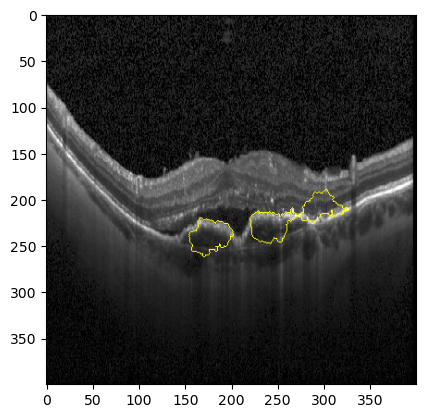

In [14]:
a = int(input("Which image between 0-7 would you like to see?"))
plt.imshow(mark_boundaries(temps[a], masks[a]))

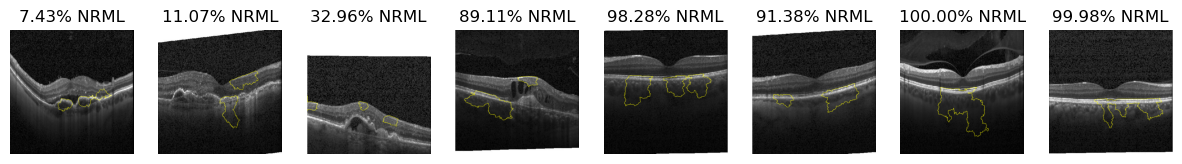

In [15]:
fig, axes = plt.subplots(1, 8, figsize=(15, 15))

for i in range(8):
        axes[i].imshow(mark_boundaries(temps[i], masks[i]))
        axes[i].axis('off')
        axes[i].set_title("%.2f" % ((probs[i])*100) + "% NRML")
plt.show()

In [16]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

AttributeError: 'list' object has no attribute 'top_labels'